In [2]:
import os
import sys
import math
from time import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
import scipy.special as sp
from scipy.interpolate import interp1d, interp2d

from classy import Class

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
Om_ref = 0.3
Ob_ref = 0.049
Oc_ref = Om_ref - Ob_ref
wDE_ref = -1.0
h_ref = 0.67
ns_ref = 0.965
As_ref = 2.1e-09
Onu_ref = 0.0
sig8_ref = 0.85


k_per_decade = 30#180     # number of k values, controls final resolution
P_k_max_h_Mpc = 10   # this value is directly the maximum k value in the figure in Mpc


# Espectro angular de convergência $ C_\ell^{\kappa\kappa} $

## 1. Definição

A convergência de lenteamento é uma projeção da densidade de matéria ao longo da linha de visada:

$$
\kappa(\hat{\mathbf{n}}) = \int_0^\infty dz\, W_\kappa(z)\,
\delta_m\!\big(\chi(z)\hat{\mathbf{n}}, z\big),
$$

onde o **kernel de lenteamento** é dado por

$$
W_\kappa(z) = \frac{3}{2}\,\Omega_m\left(\frac{H_0}{c}\right)^2
\frac{(1+z)\,\chi(z)}{H(z)}
\int_z^\infty dz_s\, n_s(z_s)\,
\frac{\chi(z_s) - \chi(z)}{\chi(z_s)}.
$$

Para uma população de fontes concentrada em um único plano a $ z_s $:

$$
W_\kappa(z) = \frac{3}{2}\,\Omega_m\left(\frac{H_0}{c}\right)^2
\frac{(1+z)\,\chi(z)}{H(z)}\,
\frac{\chi_s - \chi(z)}{\chi_s}\,\Theta(\chi_s - \chi).
$$

---

## 2. Expansão em harmônicos

A convergência é expandida em harmônicos esféricos:

$$
a_{\ell m}^{\kappa} = \int d\hat{\mathbf{n}}\, \kappa(\hat{\mathbf{n}})\, Y_{\ell m}^*(\hat{\mathbf{n}}).
$$

Substituindo a projeção em Fourier:

$$
a_{\ell m}^{\kappa} = \int_0^\infty dz\, W_\kappa(z)
\int \frac{d^3\mathbf{k}}{(2\pi)^3}\,
\delta_m(\mathbf{k},z)\,
j_\ell\!\big(k\chi(z)\big)\,
Y_{\ell m}^*(\hat{\mathbf{k}}).
$$

---

## 3. Simplificação dos harmônicos $ Y_{\ell m} $

O espectro angular é:

$$
\langle a_{\ell m}^{\kappa} a_{\ell' m'}^{\kappa*} \rangle
= C_\ell^{\kappa\kappa}\, \delta_{\ell\ell'}\, \delta_{mm'}.
$$

Usando a isotropia estatística:

$$
\langle \delta_m(\mathbf{k},z)\, \delta_m^*(\mathbf{k}',z') \rangle
= (2\pi)^3 \delta_D(\mathbf{k}-\mathbf{k}')\, P_m(k;z,z'),
$$

e a ortogonalidade dos harmônicos:

$$
\int d\Omega_{\hat{\mathbf{k}}}\,
Y_{\ell m}^*(\hat{\mathbf{k}})\, Y_{\ell' m'}(\hat{\mathbf{k}})
= \delta_{\ell\ell'}\, \delta_{mm'},
$$

resulta em:

$$
C_\ell^{\kappa\kappa} =
\int dz\,dz'\, W_\kappa(z)\, W_\kappa(z')\,
\int \frac{k^2\,dk}{2\pi^2}\,
P_m(k;z,z')\,
j_\ell[k\chi(z)]\, j_\ell[k\chi(z')].
$$

---

## 4. Aproximação de Limber

Para $ \ell \gtrsim 10 $, usa-se:

$$
\int k^2 dk\, j_\ell(k\chi)\,j_\ell(k\chi')
\simeq \frac{\pi}{2}\,\frac{\delta_D(\chi - \chi')}{\chi^2}.
$$

Assim:

$$
C_\ell^{\kappa\kappa}
\simeq \int_0^\infty \frac{dz}{H(z)}\,
\frac{W_\kappa^2(z)}{\chi^2(z)}\,
P_m\!\left(k = \frac{\ell + 1/2}{\chi(z)}, z\right).
$$

---

## 5. Tomografia (bins $ i, j $)

Com distribuições de fontes $n_i(z), n_j(z) $ e kernels $ W_i, W_j $:

$$
C_\ell^{\kappa_i\kappa_j}
\simeq \int_0^\infty \frac{dz}{H(z)}\,
\frac{W_i(z)\,W_j(z)}{\chi^2(z)}\,
P_m\!\left(\frac{\ell + 1/2}{\chi(z)}, z\right).
$$

onde

$$
W_i(z)=\frac{3}{2}\,\Omega_m\left(\frac{H_0}{c}\right)^2
\frac{(1+z)\,\chi(z)}{H(z)}\,
\int_z^\infty dz_s\, n_i(z_s)\,
\frac{\chi(z_s)-\chi(z)}{\chi(z_s)}.
$$

---

## 6. Relação com o shear

O shear $ \gamma = \gamma_1 + i\gamma_2 $ é um campo *spin-2*; sua decomposição em modos $ E, B $ usa harmônicos spinados $ {}_{\pm2}Y_{\ell m} $.  
No regime linear da Relatividade Geral (Born, sem rotações múltiplas):

$$
C_\ell^{\gamma_E\gamma_E} = C_\ell^{\kappa\kappa}, \qquad
C_\ell^{\gamma_B\gamma_B} \approx 0.
$$

---

### Observações
- A aproximação de Limber é excelente para $ \ell \gtrsim 10\text{–}20 $.  
- Para escalas muito grandes (pequenos $ \ell $), é necessário usar a forma completa com $ j_\ell $.  
- O mesmo formalismo vale para correlações cruzadas $ C_\ell^{\kappa g} $ (lensing × galáxias).

/tmp/ipykernel_24018/1757832671.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm_tot = np.trapz(n_unnorm, z)
/tmp/ipykernel_24018/1757832671.py:44: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean_z   = np.trapz(z * n_of_z, z)
/tmp/ipykernel_24018/1757832671.py:79: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  frac = np.trapz(n_i, z)
/tmp/ipykernel_24018/1757832671.py:84: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean_i = np.trapz(z * n_i_norm, z)


[Total] <z> ≈ 0.962   z_med ≈ 0.904
[Bin 1: 0.0–0.6]  <z> ≈ 0.423   z_med ≈ 0.445   fração ≈ 23.0%
[Bin 2: 0.6–0.9]  <z> ≈ 0.751   z_med ≈ 0.751   fração ≈ 26.6%
[Bin 3: 0.9–1.2]  <z> ≈ 1.042   z_med ≈ 1.038   fração ≈ 23.0%
[Bin 4: 1.2–1.5]  <z> ≈ 1.336   z_med ≈ 1.329   fração ≈ 14.7%
[Bin 5: 1.5–2.0]  <z> ≈ 1.696   z_med ≈ 1.673   fração ≈ 10.1%
[Bin 6: 2.0–3.0]  <z> ≈ 2.247   z_med ≈ 2.187   fração ≈ 2.6%


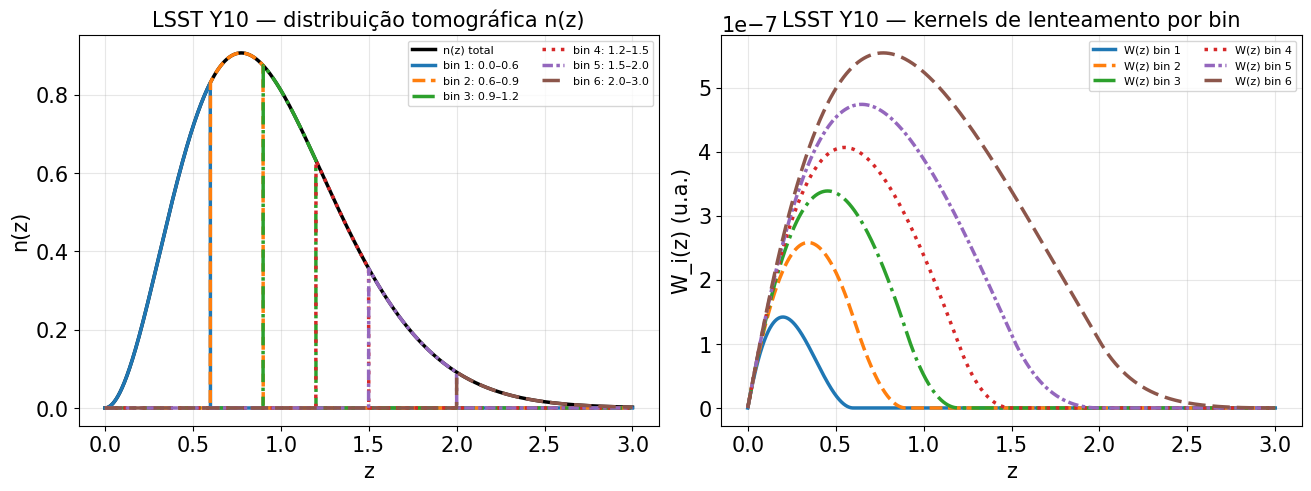

In [4]:
# LSST Year 10-like tomográfico — n(z) e W_i(z) com linestyles e linewidths variados
# ---------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Cosmologia (flat LCDM) ----------------------
c_km_s = 299_792.458
H0      = 70.0
Omega_m = 0.3
Omega_L = 1.0 - Omega_m

def E_of_z(z):
    return np.sqrt(Omega_m * (1.0 + z)**3 + Omega_L)

def H_of_z(z):
    return H0 * E_of_z(z)

# ---------------------- Grade em z ----------------------
z_max = 3.0
Nz    = 3000
z     = np.linspace(0.0, z_max, Nz)
dz    = z[1] - z[0]

# ---------------------- Distância comóvel chi(z) ----------------------
invH = 1.0 / H_of_z(z)
chi  = np.zeros_like(z)
chi[1:] = c_km_s * np.cumsum((invH[:-1] + invH[1:]) * 0.5 * dz)

# ---------------------- LSST Y10-like n(z) ----------------------
alpha_n = 2.0
beta_n  = 1.5
z0      = 0.64

def n_smail(z, z0, alpha=2.0, beta=1.5):
    nz = z**alpha * np.exp(- (z / z0)**beta)
    nz[z < 0] = 0.0
    return nz

n_unnorm = n_smail(z, z0, alpha_n, beta_n)
norm_tot = np.trapz(n_unnorm, z)
n_of_z   = n_unnorm / norm_tot

# ---------------------- Estatísticas globais ----------------------
mean_z   = np.trapz(z * n_of_z, z)
cdf      = np.cumsum((n_of_z[:-1] + n_of_z[1:]) * 0.5 * dz)
cdf      = np.concatenate([[0.0], cdf / cdf[-1]])
median_z = np.interp(0.5, cdf, z)
print(f"[Total] <z> ≈ {mean_z:.3f}   z_med ≈ {median_z:.3f}")

# ---------------------- Bins tomográficos ----------------------
edges = np.array([0.0, 0.6, 0.9, 1.2, 1.5, 2.0, 3.0])
Nbins  = len(edges) - 1

linestyles = ["-", "--", "-.", ":", (0, (3, 1, 1, 1)), (0, (5, 2)), (0, (2, 1))]

# ---------------------- Função auxiliar: kernel W(z) ----------------------
def lensing_kernel_from_nz(z, chi, H_of_z, n_of_z_norm):
    n_over_chi = np.divide(n_of_z_norm, chi, out=np.zeros_like(n_of_z_norm), where=chi > 0)
    rev_n = n_of_z_norm[::-1]
    rev_n_over_chi = n_over_chi[::-1]
    dz = z[1] - z[0]
    rev_cum_S1 = np.cumsum((rev_n[:-1] + rev_n[1:]) * 0.5 * dz)
    rev_cum_S2 = np.cumsum((rev_n_over_chi[:-1] + rev_n_over_chi[1:]) * 0.5 * dz)
    S1 = np.zeros_like(z); S1[:-1] = rev_cum_S1[::-1]; S1[-1] = 0.0
    S2 = np.zeros_like(z); S2[:-1] = rev_cum_S2[::-1]; S2[-1] = 0.0
    prefac = 1.5 * Omega_m * (H0 / c_km_s)**2
    return prefac * (1.0 + z) * (chi / H_of_z(z)) * (S1 - chi * S2)

# ---------------------- Calcular n_i(z) e W_i(z) ----------------------
n_contrib_list = []
W_list = []
stats  = []

for i in range(Nbins):
    lo, hi = edges[i], edges[i+1]
    mask   = (z >= lo) & (z < hi) if i < Nbins-1 else (z >= lo) & (z <= hi)
    n_i = np.zeros_like(z)
    n_i[mask] = n_of_z[mask]
    frac = np.trapz(n_i, z)
    if frac > 0:
        n_i_norm = n_i / frac
    else:
        n_i_norm = n_i
    mean_i = np.trapz(z * n_i_norm, z)
    cdf_i  = np.cumsum((n_i_norm[:-1] + n_i_norm[1:]) * 0.5 * dz)
    cdf_i  = np.concatenate([[0.0], cdf_i / (cdf_i[-1] if cdf_i[-1] > 0 else 1.0)])
    median_i = np.interp(0.5, cdf_i, z) if cdf_i[-1] > 0 else np.nan
    stats.append((mean_i, median_i, frac))
    n_contrib_list.append(n_i)
    W_list.append(lensing_kernel_from_nz(z, chi, H_of_z, n_i_norm))

# ---------------------- Resumo dos bins ----------------------
for i, (mean_i, med_i, frac) in enumerate(stats, start=1):
    print(f"[Bin {i}: {edges[i-1]}–{edges[i]}]  <z> ≈ {mean_i:.3f}   z_med ≈ {med_i:.3f}   fração ≈ {100*frac:.1f}%")

# ---------------------- Plots ----------------------
fig, axes = plt.subplots(1, 2, figsize=(13, 4.8), constrained_layout=True)

# n(z)
axes[0].plot(z, n_of_z, lw=2.5, color="k", label="n(z) total")
for i, n_i in enumerate(n_contrib_list, start=1):
    ls = linestyles[(i-1) % len(linestyles)]
    axes[0].plot(z, n_i, lw=2.5, linestyle=ls, label=f"bin {i}: {edges[i-1]}–{edges[i]}")
axes[0].set_xlabel("z")
axes[0].set_ylabel("n(z)")
axes[0].set_title("LSST Y10 — distribuição tomográfica n(z)")
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=8, ncol=2)

# W(z)
for i, W_i in enumerate(W_list, start=1):
    ls = linestyles[(i-1) % len(linestyles)]
    axes[1].plot(z, W_i, lw=2.5, linestyle=ls, label=f"W(z) bin {i}")
axes[1].set_xlabel("z")
axes[1].set_ylabel("W_i(z) (u.a.)")
axes[1].set_title("LSST Y10 — kernels de lenteamento por bin")
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=8, ncol=2)

plt.show()

/tmp/ipykernel_24018/189897465.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  n_of_z   = n_unnorm / np.trapz(n_unnorm, z)
/tmp/ipykernel_24018/189897465.py:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean_z = np.trapz(z*n_of_z, z)
/tmp/ipykernel_24018/189897465.py:66: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  frac_i = np.trapz(n_i, z)
/tmp/ipykernel_24018/189897465.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean_i = np.trapz(z*n_i_norm, z)


[Total] <z> ≈ 0.962   z_med ≈ 0.904
[Bin 1: 0.0–0.6]  <z>≈0.423  z_med≈0.445  fração≈23.0%
[Bin 2: 0.6–0.9]  <z>≈0.751  z_med≈0.751  fração≈26.6%
[Bin 3: 0.9–1.2]  <z>≈1.042  z_med≈1.038  fração≈23.0%
[Bin 4: 1.2–1.5]  <z>≈1.336  z_med≈1.329  fração≈14.7%
[Bin 5: 1.5–2.0]  <z>≈1.696  z_med≈1.673  fração≈10.1%
[Bin 6: 2.0–3.0]  <z>≈2.247  z_med≈2.187  fração≈2.6%


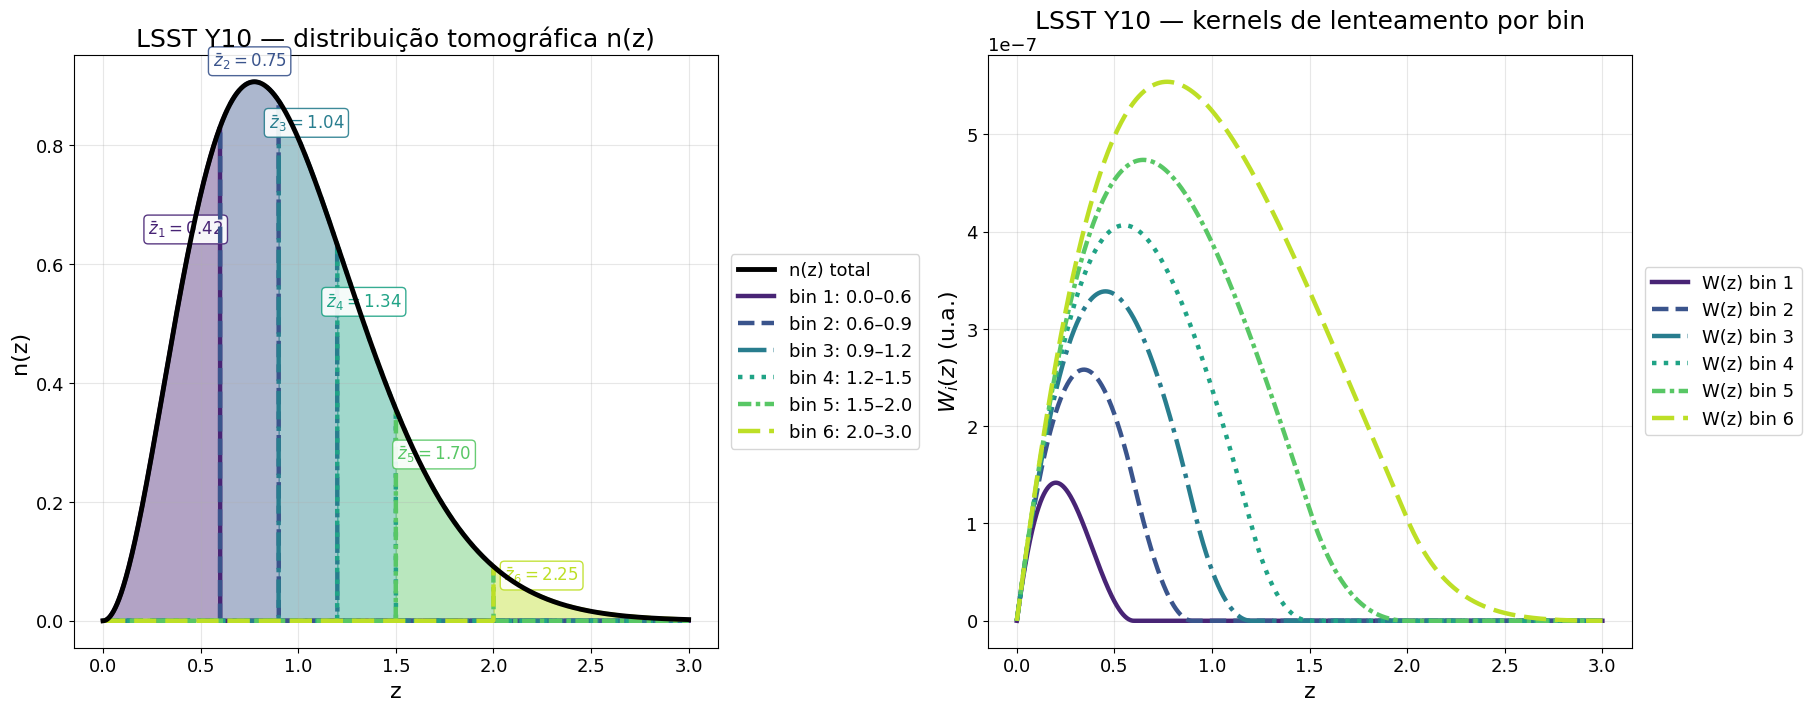

In [5]:
# LSST Y10 — n(z) empilhado + W_i(z) com fontes maiores e sem overlap
import numpy as np
import matplotlib.pyplot as plt

# ---------- Aparência global ----------
plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13
})

# ---------- Cosmologia ----------
c_km_s = 299_792.458
H0, Omega_m = 70.0, 0.3
Omega_L = 1.0 - Omega_m
def E_of_z(z): return np.sqrt(Omega_m*(1+z)**3 + Omega_L)
def H_of_z(z): return H0*E_of_z(z)

# ---------- Grade ----------
z_max, Nz = 3.0, 3000
z = np.linspace(0.0, z_max, Nz)
dz = z[1]-z[0]

# ---------- Distância comóvel ----------
invH = 1.0 / H_of_z(z)
chi  = np.zeros_like(z); chi[1:] = c_km_s*np.cumsum((invH[:-1]+invH[1:])*0.5*dz)

# ---------- n(z) LSST Y10-like ----------
alpha_n, beta_n, z0 = 2.0, 1.5, 0.64
def n_smail(z, z0, alpha=2.0, beta=1.5):
    nz = z**alpha * np.exp(-(z/z0)**beta); nz[z<0] = 0.0; return nz
n_unnorm = n_smail(z, z0, alpha_n, beta_n)
n_of_z   = n_unnorm / np.trapz(n_unnorm, z)

# ---------- Estatísticas globais ----------
mean_z = np.trapz(z*n_of_z, z)
cdf    = np.cumsum((n_of_z[:-1]+n_of_z[1:])*0.5*dz); cdf = np.concatenate([[0.0], cdf/cdf[-1]])
median_z = np.interp(0.5, cdf, z)
print(f"[Total] <z> ≈ {mean_z:.3f}   z_med ≈ {median_z:.3f}")

# ---------- Bins tomográficos ----------
edges = np.array([0.0, 0.6, 0.9, 1.2, 1.5, 2.0, 3.0]); Nbins = len(edges)-1
linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,2)), (0,(2,1))]

# ---------- Kernel auxiliar ----------
def lensing_kernel_from_nz(z, chi, H_of_z, n_of_z_norm):
    n_over_chi = np.divide(n_of_z_norm, chi, out=np.zeros_like(n_of_z_norm), where=chi>0)
    rev_n, rev_n_over_chi = n_of_z_norm[::-1], n_over_chi[::-1]
    dz = z[1]-z[0]
    rev_S1 = np.cumsum((rev_n[:-1]+rev_n[1:])*0.5*dz)
    rev_S2 = np.cumsum((rev_n_over_chi[:-1]+rev_n_over_chi[1:])*0.5*dz)
    S1 = np.zeros_like(z); S1[:-1] = rev_S1[::-1]
    S2 = np.zeros_like(z); S2[:-1] = rev_S2[::-1]
    pref = 1.5*Omega_m*(H0/c_km_s)**2
    return pref*(1+z)*(chi/H_of_z(z))*(S1 - chi*S2)

# ---------- n_i(z), W_i(z), stats ----------
n_contrib_list, W_list, stats = [], [], []
for i in range(Nbins):
    lo, hi = edges[i], edges[i+1]
    mask = (z>=lo)&(z<hi) if i<Nbins-1 else (z>=lo)&(z<=hi)
    n_i = np.zeros_like(z); n_i[mask] = n_of_z[mask]
    frac_i = np.trapz(n_i, z)
    n_i_norm = n_i/frac_i if frac_i>0 else n_i
    mean_i = np.trapz(z*n_i_norm, z)
    cdf_i = np.cumsum((n_i_norm[:-1]+n_i_norm[1:])*0.5*dz)
    denom = cdf_i[-1] if cdf_i[-1]>0 else 1.0
    cdf_i = np.concatenate([[0.0], cdf_i/denom])
    median_i = np.interp(0.5, cdf_i, z) if denom>0 else np.nan
    stats.append((mean_i, median_i, frac_i))
    n_contrib_list.append(n_i)
    W_list.append(lensing_kernel_from_nz(z, chi, H_of_z, n_i_norm))

for i,(m,med,f) in enumerate(stats,1):
    print(f"[Bin {i}: {edges[i-1]}–{edges[i]}]  <z>≈{m:.3f}  z_med≈{med:.3f}  fração≈{100*f:.1f}%")

# ---------- Plots grandes com legends fora ----------
fig, axes = plt.subplots(1, 2, figsize=(18, 7), constrained_layout=True)

# Esquerda: n(z) empilhado + rótulos \bar z_i
axes[0].plot(z, n_of_z, color="k", lw=3.5, label="n(z) total", zorder=5)
bottom = np.zeros_like(z)
colors = plt.cm.viridis(np.linspace(0.1, 0.9, Nbins))

for i, n_i in enumerate(n_contrib_list, start=1):
    ls, color = linestyles[(i-1)%len(linestyles)], colors[i-1]
    axes[0].fill_between(z, bottom, bottom+n_i, color=color, alpha=0.42, zorder=1)
    axes[0].plot(z, n_i, lw=3.2, linestyle=ls, color=color, label=f"bin {i}: {edges[i-1]}–{edges[i]}", zorder=3)
    # rótulo em \bar z_i com deslocamentos alternados para evitar overlap
    mean_i = stats[i-1][0]
    y_at_mean = np.interp(mean_i, z, n_i)
    dy = 18 if i%2 else 8  # alterna offsets verticais
    axes[0].annotate(rf"$\bar z_{{{i}}}={mean_i:.2f}$",
                     xy=(mean_i, y_at_mean), xytext=(0, dy), textcoords="offset points",
                     ha="center", va="bottom", fontsize=12, color=color, clip_on=False,
                     bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=color, alpha=0.9))
    bottom += n_i

axes[0].set_xlabel("z"); axes[0].set_ylabel("n(z)")
axes[0].set_title("LSST Y10 — distribuição tomográfica n(z)")
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.0, frameon=True)

# Direita: W_i(z) com os mesmos estilos/cores
for i, W_i in enumerate(W_list, start=1):
    ls, color = linestyles[(i-1)%len(linestyles)], colors[i-1]
    axes[1].plot(z, W_i, lw=3.2, linestyle=ls, color=color, label=f"W(z) bin {i}")
axes[1].set_xlabel("z"); axes[1].set_ylabel(r"$W_i(z)$ (u.a.)")
axes[1].set_title("LSST Y10 — kernels de lenteamento por bin")
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.0, frameon=True)

plt.show()


/tmp/ipykernel_24018/1053116527.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  n_of_z   = n_unnorm / np.trapz(n_unnorm, z)
/tmp/ipykernel_24018/1053116527.py:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean_z = np.trapz(z*n_of_z, z)
/tmp/ipykernel_24018/1053116527.py:66: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  frac_i = np.trapz(n_i, z)
/tmp/ipykernel_24018/1053116527.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean_i = np.trapz(z*n_i_norm, z)


[Total] <z> ≈ 0.962   z_med ≈ 0.904
[Bin 1: 0.0–0.6]  <z>≈0.423  z_med≈0.445  fração≈23.0%
[Bin 2: 0.6–0.9]  <z>≈0.751  z_med≈0.751  fração≈26.6%
[Bin 3: 0.9–1.2]  <z>≈1.042  z_med≈1.038  fração≈23.0%
[Bin 4: 1.2–1.5]  <z>≈1.336  z_med≈1.329  fração≈14.7%
[Bin 5: 1.5–2.0]  <z>≈1.696  z_med≈1.673  fração≈10.1%
[Bin 6: 2.0–3.0]  <z>≈2.247  z_med≈2.187  fração≈2.6%


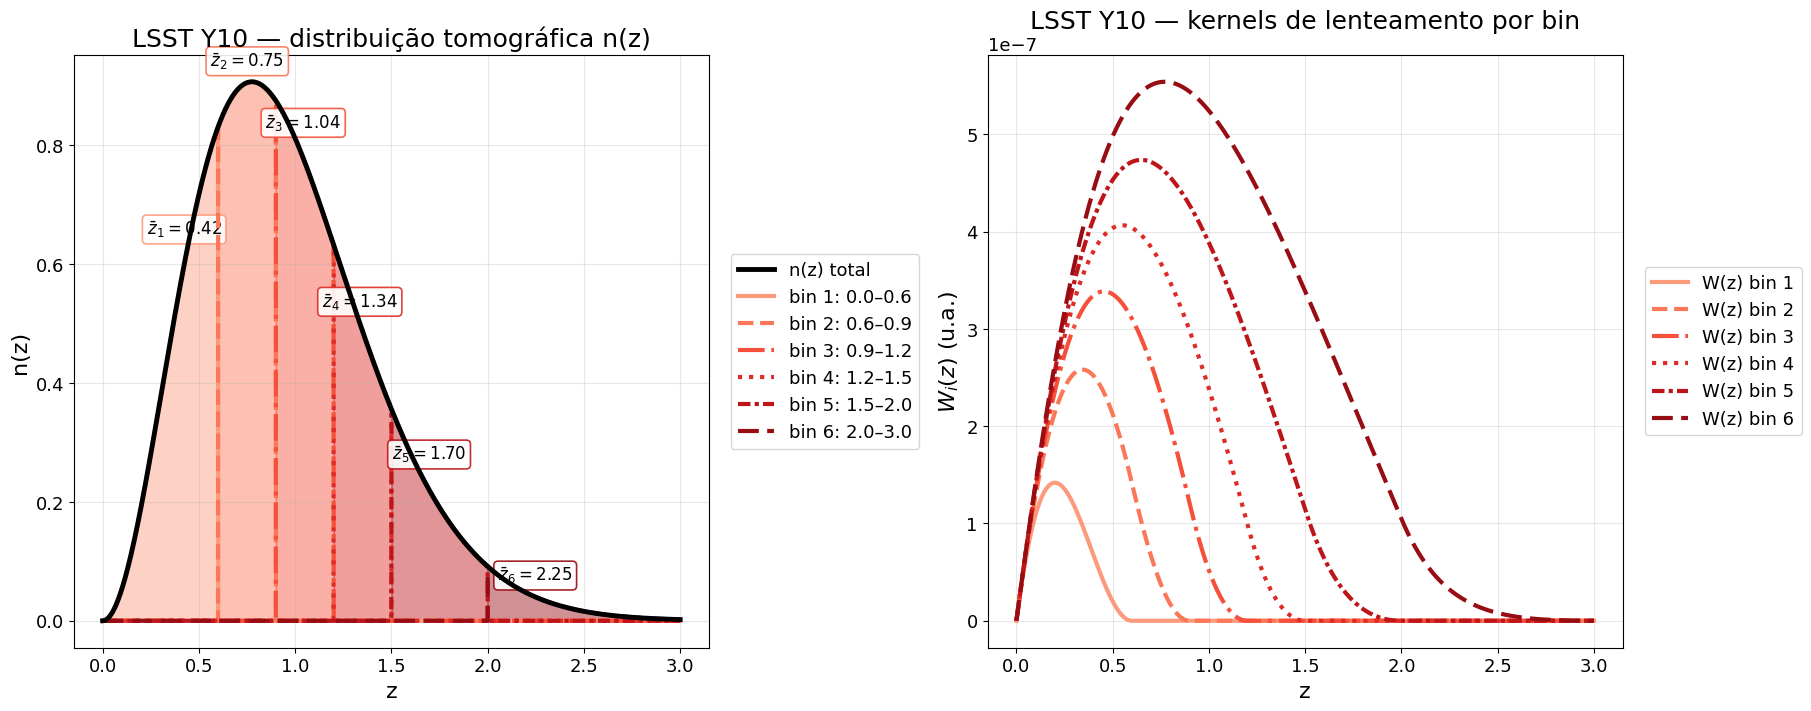

In [6]:
# LSST Y10 — n(z) empilhado + W_i(z) com paleta Reds e fontes maiores
import numpy as np
import matplotlib.pyplot as plt

# ---------- Aparência global ----------
plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13
})

# ---------- Cosmologia ----------
c_km_s = 299_792.458
H0, Omega_m = 70.0, 0.3
Omega_L = 1.0 - Omega_m
def E_of_z(z): return np.sqrt(Omega_m*(1+z)**3 + Omega_L)
def H_of_z(z): return H0*E_of_z(z)

# ---------- Grade ----------
z_max, Nz = 3.0, 3000
z = np.linspace(0.0, z_max, Nz)
dz = z[1]-z[0]

# ---------- Distância comóvel ----------
invH = 1.0 / H_of_z(z)
chi  = np.zeros_like(z); chi[1:] = c_km_s*np.cumsum((invH[:-1]+invH[1:])*0.5*dz)

# ---------- n(z) LSST Y10-like ----------
alpha_n, beta_n, z0 = 2.0, 1.5, 0.64
def n_smail(z, z0, alpha=2.0, beta=1.5):
    nz = z**alpha * np.exp(-(z/z0)**beta); nz[z<0] = 0.0; return nz
n_unnorm = n_smail(z, z0, alpha_n, beta_n)
n_of_z   = n_unnorm / np.trapz(n_unnorm, z)

# ---------- Estatísticas globais ----------
mean_z = np.trapz(z*n_of_z, z)
cdf    = np.cumsum((n_of_z[:-1]+n_of_z[1:])*0.5*dz); cdf = np.concatenate([[0.0], cdf/cdf[-1]])
median_z = np.interp(0.5, cdf, z)
print(f"[Total] <z> ≈ {mean_z:.3f}   z_med ≈ {median_z:.3f}")

# ---------- Bins tomográficos ----------
edges = np.array([0.0, 0.6, 0.9, 1.2, 1.5, 2.0, 3.0]); Nbins = len(edges)-1
linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,2)), (0,(2,1))]

# ---------- Kernel auxiliar ----------
def lensing_kernel_from_nz(z, chi, H_of_z, n_of_z_norm):
    n_over_chi = np.divide(n_of_z_norm, chi, out=np.zeros_like(n_of_z_norm), where=chi>0)
    rev_n, rev_n_over_chi = n_of_z_norm[::-1], n_over_chi[::-1]
    dz = z[1]-z[0]
    rev_S1 = np.cumsum((rev_n[:-1]+rev_n[1:])*0.5*dz)
    rev_S2 = np.cumsum((rev_n_over_chi[:-1]+rev_n_over_chi[1:])*0.5*dz)
    S1 = np.zeros_like(z); S1[:-1] = rev_S1[::-1]
    S2 = np.zeros_like(z); S2[:-1] = rev_S2[::-1]
    pref = 1.5*Omega_m*(H0/c_km_s)**2
    return pref*(1+z)*(chi/H_of_z(z))*(S1 - chi*S2)

# ---------- n_i(z), W_i(z), stats ----------
n_contrib_list, W_list, stats = [], [], []
for i in range(Nbins):
    lo, hi = edges[i], edges[i+1]
    mask = (z>=lo)&(z<hi) if i<Nbins-1 else (z>=lo)&(z<=hi)
    n_i = np.zeros_like(z); n_i[mask] = n_of_z[mask]
    frac_i = np.trapz(n_i, z)
    n_i_norm = n_i/frac_i if frac_i>0 else n_i
    mean_i = np.trapz(z*n_i_norm, z)
    cdf_i = np.cumsum((n_i_norm[:-1]+n_i_norm[1:])*0.5*dz)
    denom = cdf_i[-1] if cdf_i[-1]>0 else 1.0
    cdf_i = np.concatenate([[0.0], cdf_i/denom])
    median_i = np.interp(0.5, cdf_i, z) if denom>0 else np.nan
    stats.append((mean_i, median_i, frac_i))
    n_contrib_list.append(n_i)
    W_list.append(lensing_kernel_from_nz(z, chi, H_of_z, n_i_norm))

for i,(m,med,f) in enumerate(stats,1):
    print(f"[Bin {i}: {edges[i-1]}–{edges[i]}]  <z>≈{m:.3f}  z_med≈{med:.3f}  fração≈{100*f:.1f}%")

# ---------- Plots com paleta Reds ----------
fig, axes = plt.subplots(1, 2, figsize=(18, 7), constrained_layout=True)

axes[0].plot(z, n_of_z, color="k", lw=3.5, label="n(z) total", zorder=5)
bottom = np.zeros_like(z)
colors = plt.cm.Reds(np.linspace(0.35, 0.9, Nbins))  # tons de vermelho claros → escuros

for i, n_i in enumerate(n_contrib_list, start=1):
    ls, color = linestyles[(i-1)%len(linestyles)], colors[i-1]
    axes[0].fill_between(z, bottom, bottom+n_i, color=color, alpha=0.45, zorder=1)
    axes[0].plot(z, n_i, lw=3.0, linestyle=ls, color=color, label=f"bin {i}: {edges[i-1]}–{edges[i]}", zorder=3)
    mean_i = stats[i-1][0]
    y_at_mean = np.interp(mean_i, z, n_i)
    dy = 18 if i%2 else 8
    axes[0].annotate(rf"$\bar z_{{{i}}}={mean_i:.2f}$",
                     xy=(mean_i, y_at_mean), xytext=(0, dy), textcoords="offset points",
                     ha="center", va="bottom", fontsize=12, color="black",
                     bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=color, lw=1.2, alpha=0.9))
    bottom += n_i

axes[0].set_xlabel("z"); axes[0].set_ylabel("n(z)")
axes[0].set_title("LSST Y10 — distribuição tomográfica n(z)")
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True)

# Direita: W_i(z)
for i, W_i in enumerate(W_list, start=1):
    ls, color = linestyles[(i-1)%len(linestyles)], colors[i-1]
    axes[1].plot(z, W_i, lw=3.0, linestyle=ls, color=color, label=f"W(z) bin {i}")
axes[1].set_xlabel("z"); axes[1].set_ylabel(r"$W_i(z)$ (u.a.)")
axes[1].set_title("LSST Y10 — kernels de lenteamento por bin")
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True)

plt.show()


In [7]:
from time import perf_counter

# ----------------------------------------------------------
# Lista de valores de sigma8 a serem testados
# ----------------------------------------------------------
sig8_list = [0.75, 0.80, 0.85, 0.90, 0.95]

# ----------------------------------------------------------
# Parâmetros cosmológicos de referência
# ----------------------------------------------------------
h_ref   = 0.67
Ob_ref  = 0.049
Om_ref  = 0.315
ns_ref  = 0.965
P_k_max_h_Mpc = 5.0
k_per_decade  = 50

# ----------------------------------------------------------
# Cria dicionário de cosmologias (variando apenas sigma8)
# ----------------------------------------------------------
cosmo_dict = {}
for sig8_ref in sig8_list:
    cosmo_name = "cosmo_sig8_{:.2f}".format(sig8_ref)
    cosmo_dict[cosmo_name] = {
        'output': 'mPk',
        # 'radiation_streaming_approximation': 3,  # Desativar aprox. de fluido p/ radiação
        # 'ncdm_fluid_approximation': 3,           # Desativar aprox. de fluido p/ ν massivos
        # 'ur_fluid_approximation': 2,             # Desativar aprox. de fluido p/ ν sem massa
        'Omega_Lambda': 0,                        # Ativa automaticamente a evolução _fld (DE dinâmica)
        'w0_fld': '-1.',                          # Equação de estado da DE (constante)
        'wa_fld': '0.0',                          # Variação temporal de w(a)
        'sigma8': sig8_ref,                       # Variável principal testada
        'n_s': ns_ref,                            # Índice espectral primordial
        'background_verbose': 0,                  # Verbosidade do módulo background
        'perturbations_verbose': 0,               # Verbosidade do módulo perturbations
        'gauge': 'Synchronous',                   # Gauge síncrono (mais estável num.)
        'z_pk': '1.0, 0.0',                       # Redshifts para saída de P(k)
        'P_k_max_h/Mpc': P_k_max_h_Mpc,           # k máximo para P(k)
        'k_per_decade_for_pk': k_per_decade,      # n° de bins de k por década log
        'h': h_ref,                               # Parâmetro de Hubble reduzido
        'Omega_b': Ob_ref,                        # Densidade de bárions
        'Omega_cdm': Om_ref - Ob_ref              # Densidade de CDM
    }

# ----------------------------------------------------------
# Loop: calcular cada cosmologia, medir tempo e armazenar
# ----------------------------------------------------------
results = {}          # guarda os objetos Class
durations = {}        # guarda tempos em segundos por cosmologia

for name, params in cosmo_dict.items():
    start = perf_counter()
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    end = perf_counter()

    results[name] = cosmo
    durations[name] = end - start
    print("{} resolvida (σ₈ = {:.2f}) em {:.2f} s".format(name, params['sigma8'], durations[name]))

# ----------------------------------------------------------
# Sumário final (ordenado do mais rápido ao mais lento)
# ----------------------------------------------------------
print("\n== Tempo por cosmologia ==")
for name in sorted(durations, key=durations.get):
    print("{:<18s}  {:6.2f} s".format(name, durations[name]))

# Exemplo de acesso a P(k, z=0):
# pk = results['cosmo_sig8_0.85'].pk(k=0.1, z=0)


cosmo_sig8_0.75 resolvida (σ₈ = 0.75) em 0.85 s
cosmo_sig8_0.80 resolvida (σ₈ = 0.80) em 0.78 s
cosmo_sig8_0.85 resolvida (σ₈ = 0.85) em 0.78 s
cosmo_sig8_0.90 resolvida (σ₈ = 0.90) em 0.72 s
cosmo_sig8_0.95 resolvida (σ₈ = 0.95) em 0.77 s

== Tempo por cosmologia ==
cosmo_sig8_0.90       0.72 s
cosmo_sig8_0.95       0.77 s
cosmo_sig8_0.85       0.78 s
cosmo_sig8_0.80       0.78 s
cosmo_sig8_0.75       0.85 s


sigma8=0.75 resolvido em 1.10 s
sigma8=0.80 resolvido em 1.14 s
sigma8=0.85 resolvido em 1.03 s
sigma8=0.90 resolvido em 1.01 s
sigma8=0.95 resolvido em 1.04 s


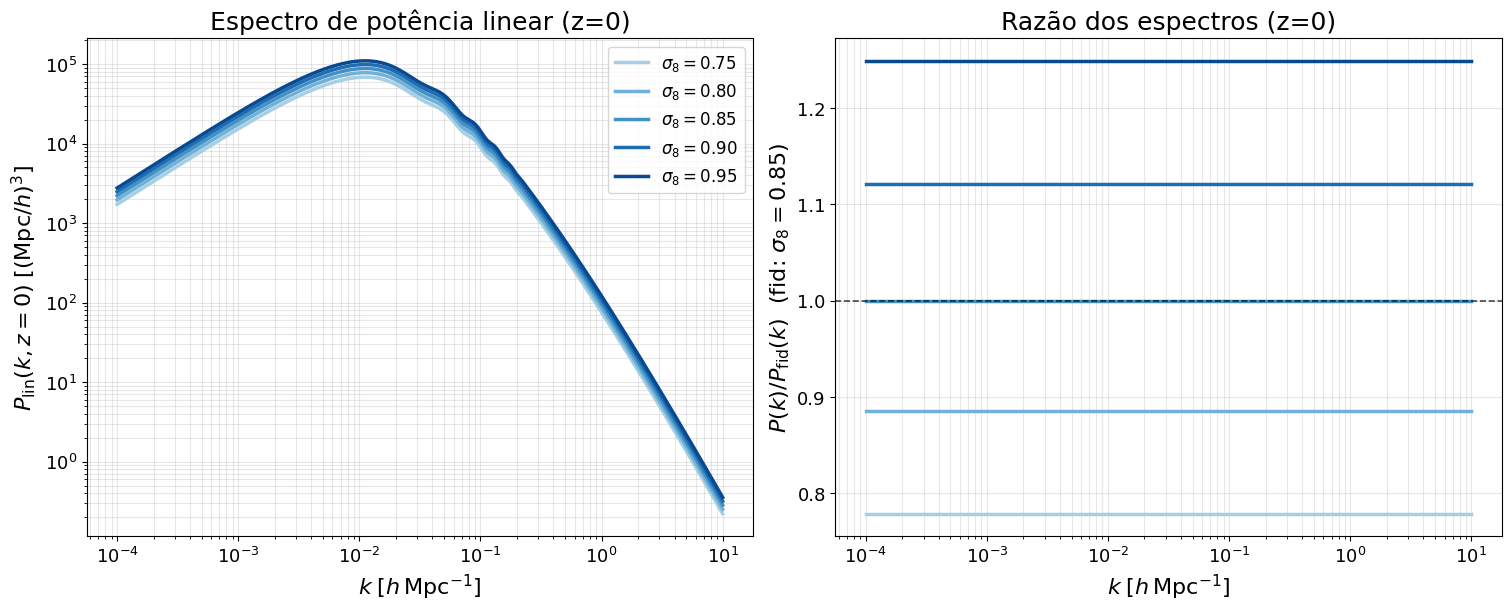

In [8]:
# Variando sigma8 no CLASS e plotando P_lin(k,z=0) e a razão vs fiducial (paleta Blues)
# ------------------------------------------------------------------------------------
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

# ------------------------ Configuração ------------------------
sig8_list = [0.75, 0.80, 0.85, 0.90, 0.95]
fid_sigma8 = 0.85                   # fiducial para a razão
h_ref   = 0.67
Ob_ref  = 0.049
Om_ref  = 0.315
ns_ref  = 0.965
P_k_max_h_Mpc = 20.0                 # k_max em h/Mpc para saída do CLASS
k_per_decade  = 50

# grade comum de k (h/Mpc) para amostrar P(k)
kmin, kmax = 1e-4, 10.0
Nk = 400
k_grid = np.logspace(np.log10(kmin), np.log10(kmax), Nk)

# ------------------------ Monta as cosmologias ------------------------
def build_params(sig8):
    return {
        'output': 'mPk',
        'Omega_Lambda': 0,        # ativa _fld (equivale a w0=-1, wa=0 aqui)
        'w0_fld': '-1.',
        'wa_fld': '0.0',
        'sigma8': sig8,
        'n_s': ns_ref,
        'gauge': 'Synchronous',
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': P_k_max_h_Mpc,
        'k_per_decade_for_pk': k_per_decade,
        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_ref - Ob_ref
    }

# ------------------------ Roda CLASS e coleta P(k, z=0) ------------------------
Pk_map = {}          # sig8 -> P(k) no k_grid
times  = {}

for s8 in sig8_list:
    pars = build_params(s8)
    start = perf_counter()
    cosmo = Class()
    cosmo.set(pars)
    cosmo.compute()

    # P(k) linear em z=0; CLASS espera k em h/Mpc e retorna P em (Mpc/h)^3
    Pk = np.array([cosmo.pk(k=float(k), z=0.0) for k in k_grid])
    Pk_map[s8] = Pk

    times[s8] = perf_counter() - start
    print(f"sigma8={s8:.2f} resolvido em {times[s8]:.2f} s")

# ------------------------ Seleciona fiducial ------------------------
if fid_sigma8 not in Pk_map:
    raise ValueError(f"fid_sigma8={fid_sigma8} não está em sig8_list={sig8_list}")
Pk_fid = Pk_map[fid_sigma8]

# ------------------------ Paleta Blues ------------------------
cmap_vals = np.linspace(0.35, 0.9, len(sig8_list))   # evita tons muito claros
colors = [plt.cm.Blues(v) for v in cmap_vals]

# ------------------------ Plots ------------------------
plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 12
})

fig, axes = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

# (1) P(k) linear em z=0
for s8, col in zip(sig8_list, colors):
    axes[0].loglog(k_grid, Pk_map[s8], lw=2.5, color=col, label=rf"$\sigma_8={s8:.2f}$")
axes[0].set_xlabel(r"$k\;[h\,{\rm Mpc}^{-1}]$")
axes[0].set_ylabel(r"$P_{\rm lin}(k, z=0)\;[({\rm Mpc}/h)^3]$")
axes[0].set_title("Espectro de potência linear (z=0)")
axes[0].grid(True, which="both", alpha=0.3)
axes[0].legend(ncol=1)

# (2) Razão P(k)/P_fid(k)
for s8, col in zip(sig8_list, colors):
    ratio = Pk_map[s8] / Pk_fid
    axes[1].semilogx(k_grid, ratio, lw=2.5, color=col, label=rf"$\sigma_8={s8:.2f}$")
axes[1].axhline(1.0, color='k', lw=1.2, ls='--', alpha=0.7)
axes[1].set_xlabel(r"$k\;[h\,{\rm Mpc}^{-1}]$")
axes[1].set_ylabel(r"$P(k)/P_{\rm fid}(k)$  (fid: " + rf"$\sigma_8={fid_sigma8:.2f}$" + ")")
axes[1].set_title("Razão dos espectros (z=0)")
axes[1].grid(True, which="both", alpha=0.3)
# legenda compartilhada já no painel da esquerda

plt.show()


Omega_m=0.200  k_eq=0.0098 h/Mpc   tempo=1.15s
Omega_m=0.250  k_eq=0.0122 h/Mpc   tempo=1.25s
Omega_m=0.315  k_eq=0.0154 h/Mpc   tempo=1.03s
Omega_m=0.375  k_eq=0.0183 h/Mpc   tempo=0.96s
Omega_m=0.450  k_eq=0.0220 h/Mpc   tempo=0.94s


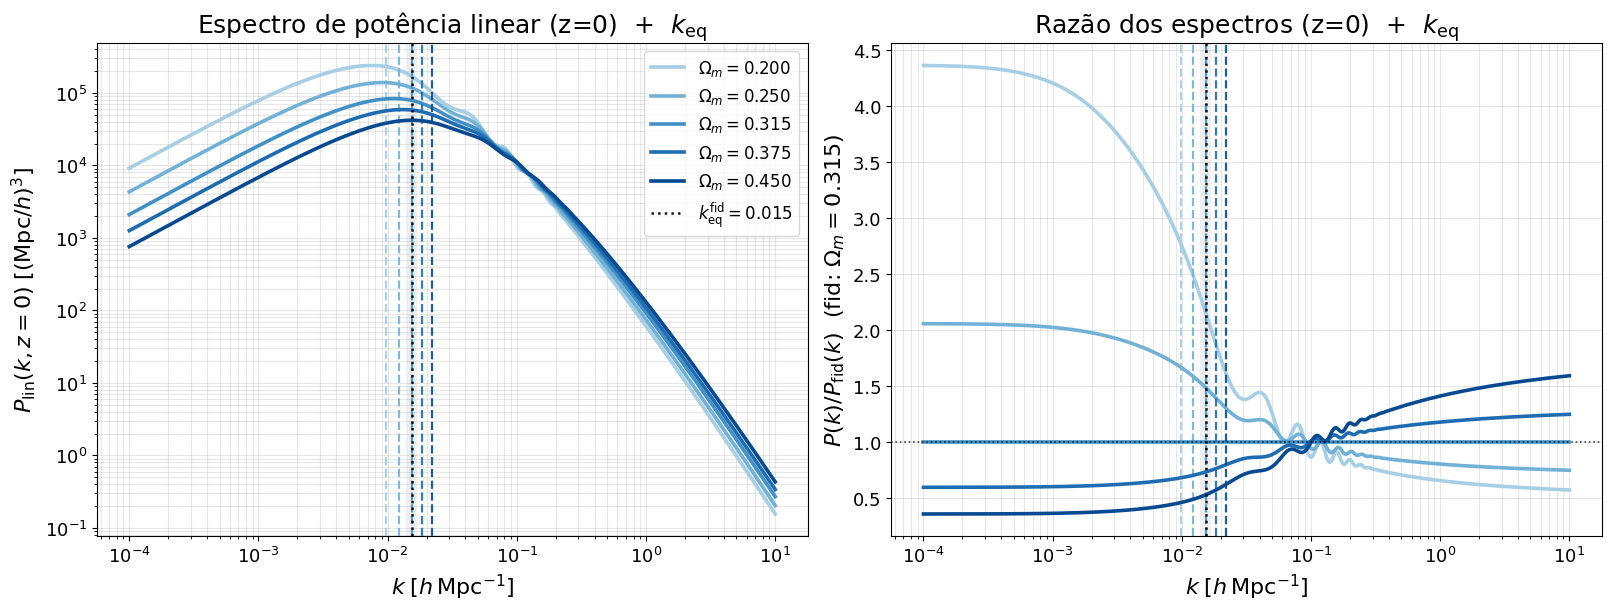

In [9]:
# Variando Omega_m no CLASS com k_eq por curva + linha e faixa no k_eq^fid (paleta Blues)
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

# ------------------------ Configuração ------------------------
Om_list = [0.2, 0.25, 0.315, 0.375, 0.45]
fid_Om  = 0.315                 # fiducial para a razão e para k_eq^fid
h_ref   = 0.67
Ob_ref  = 0.049
ns_ref  = 0.965
sig8_ref = 0.83
P_k_max_h_Mpc = 20.0
k_per_decade  = 50

# grade comum de k (h/Mpc)
kmin, kmax = 1e-4, 10
Nk = 400
k_grid = np.logspace(np.log10(kmin), np.log10(kmax), Nk)

# ------------------------ Funções auxiliares ------------------------
def build_params(Om):
    return {
        'output': 'mPk',
        'Omega_Lambda': 0,
        'w0_fld': '-1.',
        'wa_fld': '0.0',
        'sigma8': sig8_ref,
        'n_s': ns_ref,
        'gauge': 'Synchronous',
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': P_k_max_h_Mpc,
        'k_per_decade_for_pk': k_per_decade,
        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om - Ob_ref
    }

# Constantes para k_eq
Tcmb = 2.7255
Neff = 3.046
c_km_s = 299_792.458
Omega_gamma_h2 = 2.469e-5 * (Tcmb/2.7255)**4
Omega_gamma = Omega_gamma_h2 / (h_ref**2)
Omega_r = Omega_gamma * (1.0 + 0.2271 * Neff)  # inclui neutrinos relativísticos

def E_of_a(a, Om):
    Ol = 1.0 - Om
    return np.sqrt(Om * a**-3 + Omega_r * a**-4 + Ol)

def k_eq_hmpc(Om):
    a_eq = Omega_r / Om
    H0 = 100.0 * h_ref  # km/s/Mpc
    k_eq_Mpc_inv = a_eq * H0 * E_of_a(a_eq, Om) / c_km_s
    return k_eq_Mpc_inv / h_ref  # h/Mpc

# ------------------------ Roda CLASS e coleta P(k, z=0) ------------------------
Pk_map = {}
times  = {}
keq_map = {}

for Om in Om_list:
    pars = build_params(Om)
    start = perf_counter()
    cosmo = Class()
    cosmo.set(pars)
    cosmo.compute()

    Pk = np.array([cosmo.pk(k=float(k), z=0.0) for k in k_grid])
    Pk_map[Om] = Pk
    keq_map[Om] = k_eq_hmpc(Om)

    times[Om] = perf_counter() - start
    print(f"Omega_m={Om:.3f}  k_eq={keq_map[Om]:.4f} h/Mpc   tempo={times[Om]:.2f}s")

# Fiducial
Pk_fid = Pk_map[fid_Om]
k_eq_fid = keq_map[fid_Om]

# ------------------------ Paleta Blues ------------------------
cmap_vals = np.linspace(0.35, 0.9, len(Om_list))
colors = [plt.cm.Blues(v) for v in cmap_vals]

# ------------------------ Plots ------------------------
plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 12
})

fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Faixa em torno de k_eq^fid
band_frac = 0.10  # ±10% (ajuste livre)
kmin_band = k_eq_fid * (1 - band_frac)
kmax_band = k_eq_fid * (1 + band_frac)

# (1) P(k) linear em z=0 + k_eq
for Om, col in zip(Om_list, colors):
    axes[0].loglog(k_grid, Pk_map[Om], lw=2.6, color=col, label=rf"$\Omega_m={Om:.3f}$")
    axes[0].axvline(keq_map[Om], color=col, ls='--', lw=1.6, alpha=0.9)

# linha e faixa fiducial
axes[0].axvline(k_eq_fid, color='k', ls=':', lw=1.8, alpha=0.9, label=rf"$k_{{\rm eq}}^{{\rm fid}}={k_eq_fid:.3f}$")
axes[0].axvspan(kmin_band, kmax_band, color='grey', alpha=0.12, ec=None)

axes[0].set_xlabel(r"$k\;[h\,{\rm Mpc}^{-1}]$")
axes[0].set_ylabel(r"$P_{\rm lin}(k, z=0)\;[({\rm Mpc}/h)^3]$")
axes[0].set_title(r"Espectro de potência linear (z=0)  +  $k_{\rm eq}$")
axes[0].grid(True, which="both", alpha=0.3)
axes[0].legend(ncol=1)

# (2) Razão P(k)/P_fid(k) + k_eq
for Om, col in zip(Om_list, colors):
    ratio = Pk_map[Om] / Pk_fid
    axes[1].semilogx(k_grid, ratio, lw=2.6, color=col, label=rf"$\Omega_m={Om:.3f}$")
    axes[1].axvline(keq_map[Om], color=col, ls='--', lw=1.6, alpha=0.9)

axes[1].axhline(1.0, color='k', lw=1.2, ls=':', alpha=0.7)
axes[1].axvline(k_eq_fid, color='k', ls=':', lw=1.8, alpha=0.9, label=rf"$k_{{\rm eq}}^{{\rm fid}}$")
axes[1].axvspan(kmin_band, kmax_band, color='grey', alpha=0.12, ec=None)

axes[1].set_xlabel(r"$k\;[h\,{\rm Mpc}^{-1}]$")
axes[1].set_ylabel(r"$P(k)/P_{\rm fid}(k)$  (fid: " + rf"$\Omega_m={fid_Om:.3f}$" + ")")
axes[1].set_title(r"Razão dos espectros (z=0)  +  $k_{\rm eq}$")
axes[1].grid(True, which="both", alpha=0.3)

plt.show()



# Variação de $\sigma_8$ vs. $\Omega_m$ no espectro de potência linear

## Fórmula básica do espectro linear
O espectro de potência linear hoje (em $z=0$) pode ser escrito como
$$
P_{\rm lin}(k,0) \;=\; A_s \, k^{n_s}\, T^2(k;\,\Omega_m h^2,\Omega_b h^2,\ldots)\, D^2(0;\Omega_m,\Omega_\Lambda,\ldots)\,,
$$
onde $A_s$ é a amplitude primordial, $n_s$ o índice espectral, $T(k)$ a **função de transferência**
que codifica a física da transição radiação–matéria, e $D(z)$ o **fator de crescimento** linear (com $D(0)=1$ por normalização).

Uma forma analítica útil para $T(k)$ (modelo sem baryon wiggles) é a de Bardeen–Bond–Kaiser–Szalay (BBKS):
$$
T(k) \;=\; \frac{\ln(1+2.34\,q)}{2.34\,q} \,
\bigg[1 + 3.89\,q + (16.1\,q)^2 + (5.46\,q)^3 + (6.71\,q)^4\bigg]^{-1/4},
$$
com $q \equiv k/(\Gamma h)$ e o *shape parameter* $\Gamma \simeq \Omega_m h$ (aprox. sem baryons).
Parametrizações modernas (Eisenstein & Hu) incluem efeitos bariônicos com mais acurácia.

---

## O que muda quando variamos $\sigma_8$
O parâmetro
$$
\sigma_8^2 \;=\; \frac{1}{2\pi^2}\!\int_0^\infty\! dk\,k^2\,P_{\rm lin}(k)\,W^2(kR_8)
$$
controla a **normalização** do espectro (com $R_8=8\,h^{-1}{\rm Mpc}$). Mantendo os demais parâmetros fixos,
variar $\sigma_8$ **não altera a forma de $P(k)$**, apenas **multiplica** o espectro por um fator global:
$$
P_{\rm lin}(k)\ \propto\ \sigma_8^2 \quad\Rightarrow\quad \frac{P_{\rm lin}(k)}{P_{\rm lin}^{\rm fid}(k)}
\;=\; \bigg(\frac{\sigma_8}{\sigma_8^{\rm fid}}\bigg)^{\!2}\;\;(\text{constante em }k).
$$
**Consequência:** a curva da razão $P/P_{\rm fid}$ é aproximadamente **horizontal** (independente de $k$).

---

## O que muda quando variamos $\Omega_m$
Ao variar $\Omega_m$ (mantendo $h$, $\Omega_b$ etc.), mudamos a **época de igualdade radiação–matéria** e,
portanto, a **função de transferência** $T(k)$. A escala característica é
$$
k_{\rm eq} \;\equiv\; \frac{a_{\rm eq}\,H(a_{\rm eq})}{c}
\;\simeq\; 7.3\times 10^{-2}\,(\Omega_m h^2)\ \ {\rm Mpc}^{-1},
$$
com $a_{\rm eq}=\Omega_r/\Omega_m$ e $\Omega_r=\Omega_\gamma(1+0.2271\,N_{\rm eff})$.
Fisicamente:
- para $k\!\ll\! k_{\rm eq}$ (modos **super-horizonte** na igualdade): $P(k)\propto k^{n_s}$;
- para $k\!\gg\! k_{\rm eq}$ (modos **sub-horizonte** já na radiação): $T(k)$ decai e **suprime potência**.

Aumentar $\Omega_m h^2$ **aumenta $k_{\rm eq}$** (igualdade mais cedo) e desloca o *turnover* de $P(k)$ para
**$k$ maiores**. Assim, **a forma de $P(k)$ muda ao redor de $k_{\rm eq}$**.

---

## $k_{\rm eq}$ como “escala pivô” de forma
O ponto $k_{\rm eq}$ age como uma **escala pivô** para o formato do espectro: mudanças em $\Omega_m$
fazem as curvas de $P(k)$ **“girar”** em torno de $k_{\rm eq}$ — abaixo de $k_{\rm eq}$, a variação é pequena
(tilt quase preservado), enquanto acima de $k_{\rm eq}$ a supressão/realce muda de forma significativa.

**Assinatura na razão $P/P_{\rm fid}$:** uma curva **não‑constante**, frequentemente com formato de **“S”**,
cruzando $1$ próximo de $k_{\rm eq}^{\rm fid}$ (a “escala pivô”), com $P/P_{\rm fid}<1$ em uma região e
$>1$ em outra, a depender do lado de $k_{\rm eq}$.

---

## Comparação direta (resumo)

- **Variar $\sigma_8$** $\Rightarrow$ muda **amplitude** global: $P(k)$ é escalado por um fator, forma inalterada
  $\;\Rightarrow\;$ razão $P/P_{\rm fid}$ **constante em $k$**.
- **Variar $\Omega_m$** $\Rightarrow$ muda **forma** via $T(k)$ e desloca $k_{\rm eq}$
  $\;\Rightarrow\;$ razão $P/P_{\rm fid}$ **dependente de $k$**, com transição em torno de $k_{\rm eq}$
  (atua como **escala pivô**).

sum m_nu = 0.00 eV  resolvido em 0.71 s
sum m_nu = 0.06 eV  resolvido em 4.18 s
sum m_nu = 0.10 eV  resolvido em 3.62 s
sum m_nu = 0.20 eV  resolvido em 2.62 s
sum m_nu = 0.30 eV  resolvido em 2.23 s


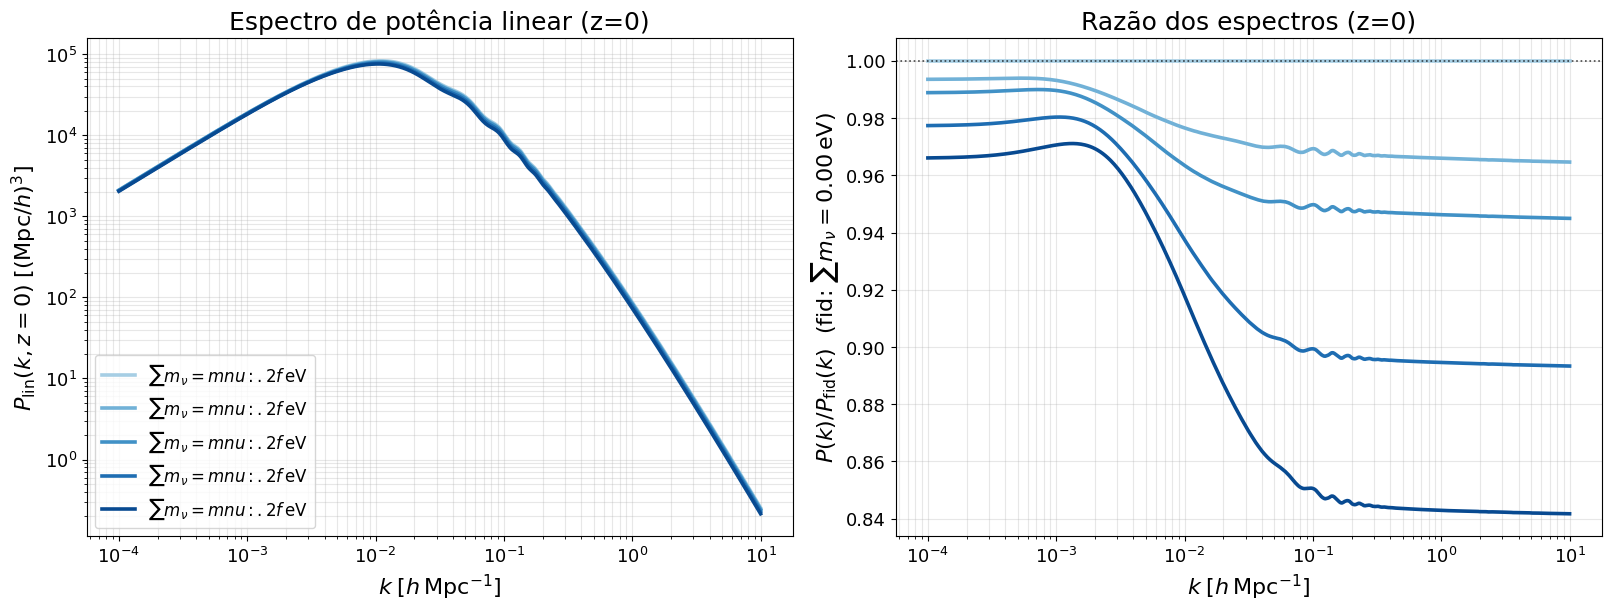

In [10]:
# CLASS: variando a soma das massas de neutrinos e comparando com fiducial (sem neutrinos massivos)
# Plots: à esquerda P_lin(k,z=0); à direita razão P(k)/P_fid(k) — paleta Blues
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

# ------------------------ Configuração base ------------------------
h_ref   = 0.67
Ob_ref  = 0.049
ns_ref  = 0.965

# Mantemos A_s fixo para ver supressão scale-dependent de m_nu
A_s_ref   = 2.1e-9
tau_reio  = 0.054

# Lista de somas de massas (eV) a testar (inclui fiducial 0.0 = massless)
mnu_list_eV = [0.00, 0.06, 0.10, 0.20, 0.30]
fid_mnu     = 0.00   # fiducial: sem neutrinos massivos

# Resolução em k e limites
P_k_max_h_Mpc = 20.0
k_per_decade  = 70

kmin, kmax = 1e-4, 10.0   # h/Mpc
Nk = 500
k_grid = np.logspace(np.log10(kmin), np.log10(kmax), Nk)

# ------------------------ Construtor de parâmetros ------------------------
def build_params_sum_mnu(sum_mnu_eV):
    """Retorna dicionário de parâmetros CLASS para dada soma de massas de neutrinos.
       - Fiducial (0 eV): todos massless -> N_ur = 3.046, N_ncdm = 0
       - Massive: 3 espécies degeneradas com T_ncdm padrão; N_ur = 0.046 (para manter N_eff ~ 3.046)
    """
    pars = {
        'output': 'mPk',
        'gauge': 'Synchronous',
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': P_k_max_h_Mpc,
        'k_per_decade_for_pk': k_per_decade,
        'h': h_ref,
        'Omega_b': Ob_ref,
        # Amplitude primordial fixa (em vez de sigma8) para expor efeito de m_nu
        'A_s': A_s_ref,
        'n_s': ns_ref,
        'tau_reio': tau_reio,
        # background: ΛCDM com Ω_Λ calculado automaticamente por flatness (não definir Omega_Lambda aqui)
    }

    if sum_mnu_eV == 0.0:
        # Todos neutrinos massless: N_ur = 3.046, sem ncdm
        pars.update({
            'N_ur': 3.046,
            'N_ncdm': 0
        })
    else:
        # 3 espécies degeneradas: m_i = sum/3 eV cada, T_ncdm padrão
        m_i = sum_mnu_eV / 3.0
        pars.update({
            'N_ur': 0.046,              # para manter N_eff ~ 3.046 no total
            'N_ncdm': 3,
            'm_ncdm': f"{m_i},{m_i},{m_i}",  # eV
            # 'T_ncdm' default de CLASS é adequado para cenário padrão
        })
    return pars

# ------------------------ Roda CLASS e coleta P(k, z=0) ------------------------
Pk_map = {}
times  = {}

for mnu in mnu_list_eV:
    pars = build_params_sum_mnu(mnu)
    start = perf_counter()
    cosmo = Class()
    cosmo.set(pars)
    cosmo.compute()

    # P(k) linear em z=0; CLASS espera k em h/Mpc e retorna P em (Mpc/h)^3
    Pk = np.array([cosmo.pk(k=float(k), z=0.0) for k in k_grid])
    Pk_map[mnu] = Pk

    times[mnu] = perf_counter() - start
    print(f"sum m_nu = {mnu:.2f} eV  resolvido em {times[mnu]:.2f} s")

# ------------------------ Fiducial (massless) ------------------------
if fid_mnu not in Pk_map:
    raise ValueError(f"fid_mnu={fid_mnu} não está em mnu_list_eV={mnu_list_eV}")
Pk_fid = Pk_map[fid_mnu]

# ------------------------ Paleta Blues ------------------------
cmap_vals = np.linspace(0.35, 0.9, len(mnu_list_eV))
colors = [plt.cm.Blues(v) for v in cmap_vals]

# ------------------------ Plots ------------------------
plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 12
})

fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# (1) P(k) linear em z=0 (sem linhas de k_eq)
for mnu, col in zip(mnu_list_eV, colors):
    axes[0].loglog(k_grid, Pk_map[mnu], lw=2.6, color=col, label=r"$\sum m_\nu={mnu:.2f}\,{\rm eV}$")
axes[0].set_xlabel(r"$k\;[h\,{\rm Mpc}^{-1}]$")
axes[0].set_ylabel(r"$P_{\rm lin}(k, z=0)\;[({\rm Mpc}/h)^3]$")
axes[0].set_title(r"Espectro de potência linear (z=0)")
axes[0].grid(True, which="both", alpha=0.3)
axes[0].legend(ncol=1)

# (2) Razão P(k)/P_fid(k)
for mnu, col in zip(mnu_list_eV, colors):
    ratio = Pk_map[mnu] / Pk_fid
    axes[1].semilogx(k_grid, ratio, lw=2.6, color=col, label=r"$\sum m_\nu={mnu:.2f}\,{\rm eV}$")
axes[1].axhline(1.0, color='k', lw=1.2, ls=':', alpha=0.7)
axes[1].set_xlabel(r"$k\;[h\,{\rm Mpc}^{-1}]$")
axes[1].set_ylabel(r"$P(k)/P_{\rm fid}(k)$  (fid: " + r"$\sum m_\nu=0.00\,{\rm eV}$" + ")")
axes[1].set_title(r"Razão dos espectros (z=0)")
axes[1].grid(True, which="both", alpha=0.3)

plt.show()


sum m_nu = 0.00 eV | Omega_cdm=0.26600 | tempo=0.77s
sum m_nu = 0.06 eV | Omega_cdm=0.26456 | tempo=4.54s
sum m_nu = 0.10 eV | Omega_cdm=0.26361 | tempo=3.99s
sum m_nu = 0.15 eV | Omega_cdm=0.26241 | tempo=2.84s
sum m_nu = 0.30 eV | Omega_cdm=0.25882 | tempo=2.48s


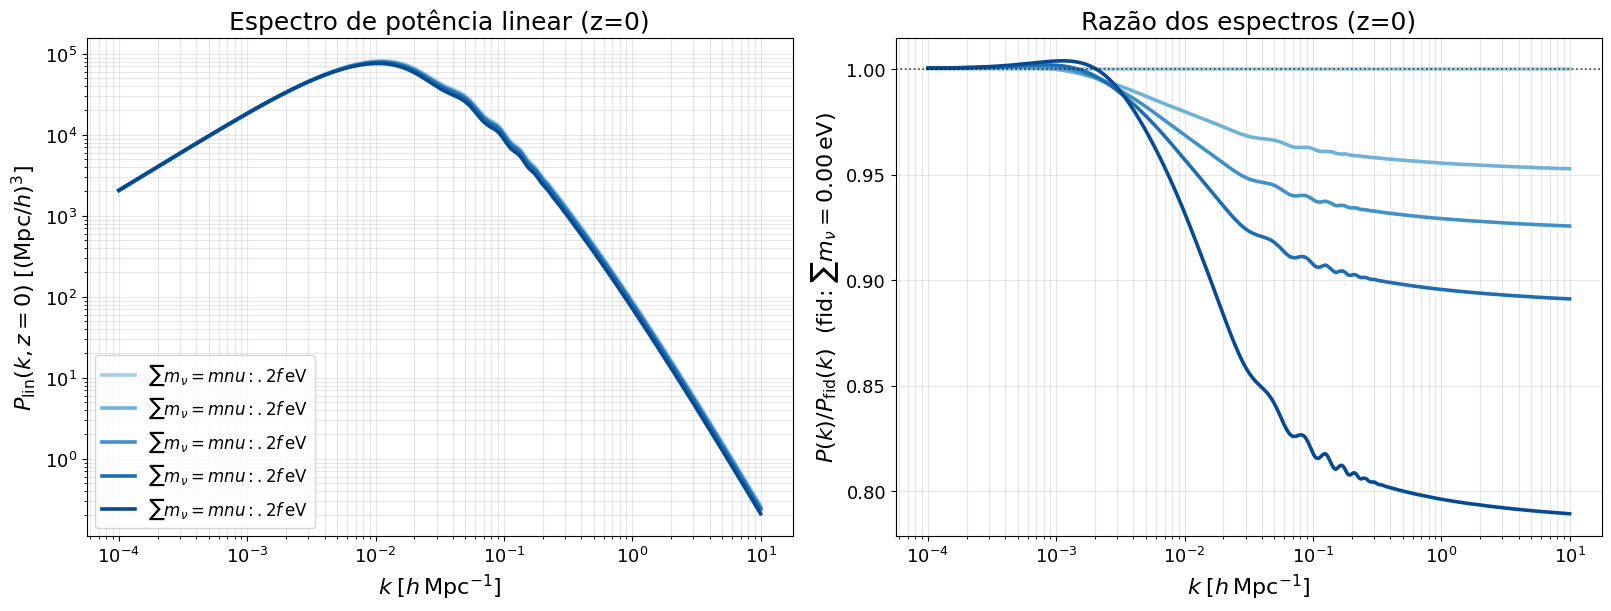

In [11]:
# CLASS: fixando Omega_m e usando Omega_cdm = Omega_m - Omega_b - Omega_nu (aprox. Omega_nu)
# Plots: P_lin(k,z=0) e razão vs. fiducial (sum m_nu = 0) — paleta Blues
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

# ------------------------ Configuração base ------------------------
h_ref    = 0.67
Om_ref   = 0.315          # <-- Omega_m FIXO
Ob_ref   = 0.049
ns_ref   = 0.965
A_s_ref  = 2.1e-9         # fixamos A_s (não sigma8) para ver o efeito scale-dependent de m_nu
tau_reio = 0.054

# Lista de somas de massas (eV) a testar (inclui fiducial 0.0 = massless)
mnu_list_eV = [0.00, 0.06, 0.10, 0.15, 0.30]
fid_mnu     = 0.00   # fiducial: sem neutrinos massivos

# Resolução e faixa em k
P_k_max_h_Mpc = 20.0
k_per_decade  = 70
kmin, kmax = 1e-4, 10.0   # h/Mpc
Nk = 500
k_grid = np.logspace(np.log10(kmin), np.log10(kmax), Nk)

# ------------------------ Aproximação para Omega_nu ------------------------
def omega_nu_of_sum_mnu(sum_mnu_eV, h):
    # Omega_nu h^2 ≈ sum m_nu / 93.14 eV  →  Omega_nu ≈ (sum m_nu / 93.14) / h^2
    return (sum_mnu_eV / 93.14) / (h**2)

# ------------------------ Construtor de parâmetros ------------------------
def build_params_sum_mnu(sum_mnu_eV):
    # calcula Omega_nu (aprox) e ajusta Omega_cdm para manter Omega_m fixo
    Om_nu = omega_nu_of_sum_mnu(sum_mnu_eV, h_ref)
    Om_cdm = Om_ref - Ob_ref - Om_nu
    if Om_cdm <= 0:
        raise ValueError(f"Omega_cdm<=0 com sum m_nu={sum_mnu_eV:.3f} eV; reduza a massa ou aumente Omega_m.")

    pars = {
        'output': 'mPk',
        'gauge': 'Synchronous',
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': P_k_max_h_Mpc,
        'k_per_decade_for_pk': k_per_decade,
        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_cdm,         # <-- definido via fechamento com Omega_m fixo
        'A_s': A_s_ref,
        'n_s': ns_ref,
        'tau_reio': tau_reio,
        # Ativa fluido de DE para fechar flatness automaticamente (Omega_fld = 1 - sum(omegas))
        'Omega_Lambda': 0,
        'w0_fld': '-1.',
        'wa_fld': '0.0',
    }

    if sum_mnu_eV == 0.0:
        # Todos massless: N_ur = 3.046, sem ncdm
        pars.update({'N_ur': 3.046, 'N_ncdm': 0})
    else:
        # 3 espécies degeneradas com massa igual; reduzir N_ur para manter N_eff~3.046
        m_i = sum_mnu_eV / 3.0
        pars.update({
            'N_ur': 0.046,
            'N_ncdm': 3,
            'm_ncdm': f"{m_i},{m_i},{m_i}",
            # T_ncdm padrão do CLASS
        })
    return pars

# ------------------------ Roda CLASS e coleta P(k, z=0) ------------------------
Pk_map = {}
times  = {}

for mnu in mnu_list_eV:
    pars = build_params_sum_mnu(mnu)
    start = perf_counter()
    cosmo = Class()
    cosmo.set(pars)
    cosmo.compute()

    Pk = np.array([cosmo.pk(k=float(k), z=0.0) for k in k_grid])  # (Mpc/h)^3
    Pk_map[mnu] = Pk

    times[mnu] = perf_counter() - start
    print(f"sum m_nu = {mnu:.2f} eV | Omega_cdm={pars['Omega_cdm']:.5f} | tempo={times[mnu]:.2f}s")

# ------------------------ Fiducial (massless) ------------------------
Pk_fid = Pk_map[fid_mnu]

# ------------------------ Paleta Blues ------------------------
cmap_vals = np.linspace(0.35, 0.9, len(mnu_list_eV))
colors = [plt.cm.Blues(v) for v in cmap_vals]

# ------------------------ Plots ------------------------
plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 12
})

fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# (1) P(k) linear em z=0
for mnu, col in zip(mnu_list_eV, colors):
    axes[0].loglog(k_grid, Pk_map[mnu], lw=2.6, color=col, label=r"$\sum m_\nu={mnu:.2f}\,{\rm eV}$")
axes[0].set_xlabel(r"$k\;[h\,{\rm Mpc}^{-1}]$")
axes[0].set_ylabel(r"$P_{\rm lin}(k, z=0)\;[({\rm Mpc}/h)^3]$")
axes[0].set_title(r"Espectro de potência linear (z=0)")
axes[0].grid(True, which="both", alpha=0.3)
axes[0].legend(ncol=1)

# (2) Razão P(k)/P_fid(k)
for mnu, col in zip(mnu_list_eV, colors):
    ratio = Pk_map[mnu] / Pk_fid
    axes[1].semilogx(k_grid, ratio, lw=2.6, color=col, label=r"$\sum m_\nu={mnu:.2f}\,{\rm eV}$")
axes[1].axhline(1.0, color='k', lw=1.2, ls=':', alpha=0.7)
axes[1].set_xlabel(r"$k\;[h\,{\rm Mpc}^{-1}]$")
axes[1].set_ylabel(r"$P(k)/P_{\rm fid}(k)$  (fid: " + r"$\sum m_\nu=0.00\,{\rm eV}$" + ")")
axes[1].set_title(r"Razão dos espectros (z=0)")
axes[1].grid(True, which="both", alpha=0.3)

plt.show()


∑mν=0.00 eV | Ω_cdm=0.26600 | fν=0.0000 | k_fs(0)=None
∑mν=0.06 eV | Ω_cdm=0.26456 | fν=0.0046 | k_fs(0)=0.0136
∑mν=0.10 eV | Ω_cdm=0.26361 | fν=0.0076 | k_fs(0)=0.02266666666666667
∑mν=0.15 eV | Ω_cdm=0.26241 | fν=0.0114 | k_fs(0)=0.033999999999999996
∑mν=0.30 eV | Ω_cdm=0.25882 | fν=0.0228 | k_fs(0)=0.06799999999999999


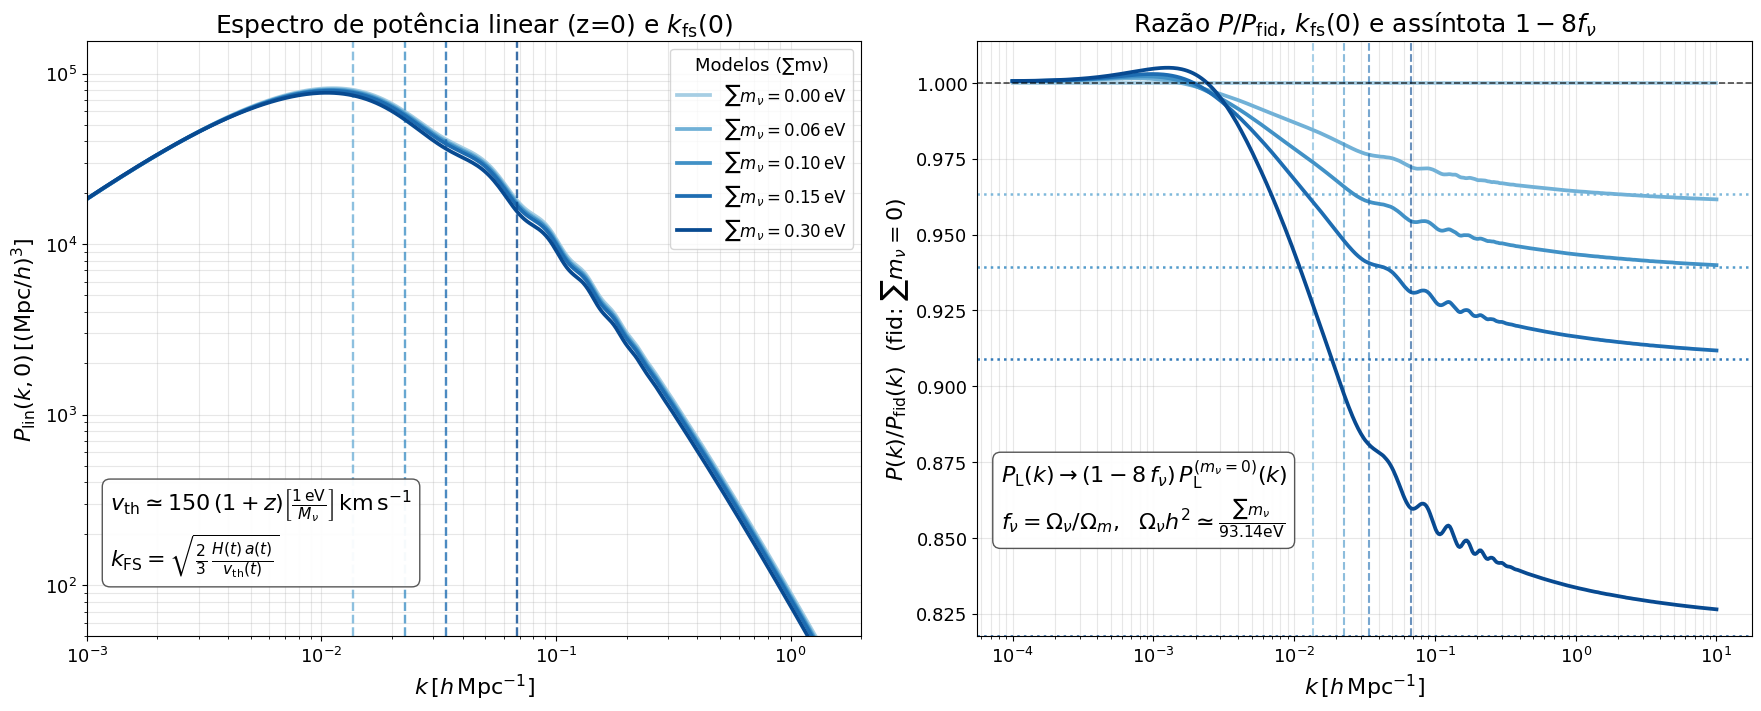

In [12]:
# CLASS: Ωm fixo, variação de ∑mν com Ω_cdm = Ω_m - Ω_b - Ω_ν
# Pega pk_cb_lin quando mν>0 e pk (total) quando mν=0
# Plots: P_lin(k,z=0) (esq) e razão P/P_fid (dir)
# Anotações: k_fs(mν,z) e supressão assintótica P -> (1-8 fν) P^(mν=0)

from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# ------------------------ Configuração cosmológica ------------------------
h_ref   = 0.67
Om_ref  = 0.315              # Ω_m FIXO
Ob_ref  = 0.049
ns_ref  = 0.965
A_s_ref = 2.1e-9             # fixamos A_s (não σ8) para expor a supressão scale-dependent
tau_reio = 0.054

# lista de somas de massas (eV). O fiducial é 0.0 eV (massless)
mnu_list_eV = [0.00, 0.06, 0.10, 0.15, 0.30]
fid_mnu     = 0.00

# grade em k
P_k_max_h_Mpc = 20.0
k_per_decade  = 70
kmin, kmax = 1e-4, 10.0       # h/Mpc
Nk = 500
k_grid = np.logspace(np.log10(kmin), np.log10(kmax), Nk)

# ------------------------ Funções auxiliares ------------------------
def omega_nu_of_sum_mnu(sum_mnu_eV, h):
    """Ω_ν ≈ (∑m_ν / 93.14 eV) / h^2"""
    return (sum_mnu_eV / 93.14) / (h**2)

def build_params_sum_mnu(sum_mnu_eV):
    """Parâmetros do CLASS com Ω_cdm ajustado para manter Ω_m fixo"""
    Om_nu  = omega_nu_of_sum_mnu(sum_mnu_eV, h_ref)
    Om_cdm = Om_ref - Ob_ref - Om_nu
    if Om_cdm <= 0:
        raise ValueError(f"Ω_cdm<=0 para ∑mν={sum_mnu_eV:.3f} eV; reduza a massa ou aumente Ω_m.")
    pars = {
        'output': 'mPk',
        'gauge': 'Synchronous',
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': P_k_max_h_Mpc,
        'k_per_decade_for_pk': k_per_decade,
        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_cdm,            # fechado com Ω_m fixo
        'A_s': A_s_ref,
        'n_s': ns_ref,
        'tau_reio': tau_reio,
        'Omega_Lambda': 0, 'w0_fld': '-1.', 'wa_fld': '0.0',  # flat ΛCDM (fld)
    }
    if sum_mnu_eV == 0.0:
        pars.update({'N_ur': 3.046, 'N_ncdm': 0})
    else:
        m_i = sum_mnu_eV / 3.0
        pars.update({'N_ur': 0.046, 'N_ncdm': 3, 'm_ncdm': f"{m_i},{m_i},{m_i}"})
    return pars, Om_nu, Om_cdm

def k_fs_hmpc(m_single_eV, z, Om0, Ol0):
    """
    k_fs(mν,z) ≈ 0.068 * (1+z)^(-2) * (mν/0.1 eV) * [Ω_m0 (1+z)^3 + Ω_Λ0]^{1/2}  (h Mpc^-1)
    Aqui usamos a massa por espécie (3 degeneradas): m_single = (∑mν)/3.
    """
    return 0.068 * (m_single_eV/0.1) * (1.0/(1.0+z)**2) * np.sqrt(Om0*(1.0+z)**3 + Ol0)

# ------------------------ Rodar CLASS e coletar P(k) ------------------------
Pk_map = {}
fnu_map = {}     # fν = Ω_ν/Ω_m
kfs_map = {}     # k_fs(z=0) por modelo (None para massless)

Ol_ref = 1.0 - Om_ref  # flat
for mnu in mnu_list_eV:
    pars, Om_nu, Om_cdm = build_params_sum_mnu(mnu)
    cosmo = Class()
    cosmo.set(pars)
    cosmo.compute()

    # Se mν>0, usar pk_cb_lin (cold+baryon); se mν=0, usar pk (total)
    if mnu > 0.0:
        Pk = np.array([cosmo.pk_cb_lin(k=float(k), z=0.0) for k in k_grid])
    else:
        Pk = np.array([cosmo.pk(k=float(k), z=0.0) for k in k_grid])

    Pk_map[mnu] = Pk
    fnu_map[mnu] = Om_nu / Om_ref

    if mnu > 0.0:
        m_single = mnu/3.0
        kfs_map[mnu] = k_fs_hmpc(m_single, z=0.0, Om0=Om_ref, Ol0=Ol_ref)
    else:
        kfs_map[mnu] = None

    print(f"∑mν={mnu:.2f} eV | Ω_cdm={pars['Omega_cdm']:.5f} | fν={fnu_map[mnu]:.4f} | k_fs(0)={kfs_map[mnu]}")

Pk_fid = Pk_map[fid_mnu]

# ------------------------ Aparência e cores ------------------------
plt.rcParams.update({
    "font.size": 13, "axes.titlesize": 18, "axes.labelsize": 16,
    "xtick.labelsize": 13, "ytick.labelsize": 13, "legend.fontsize": 12
})
cmap_vals = np.linspace(0.35, 0.9, len(mnu_list_eV))
colors = [plt.cm.Blues(v) for v in cmap_vals]

# ------------------------ Plots ------------------------
fig, axes = plt.subplots(1, 2, figsize=(17.5, 7), constrained_layout=True)

# Painel esquerdo: P_lin(k,0)
for mnu, col in zip(mnu_list_eV, colors):
    axes[0].loglog(k_grid, Pk_map[mnu], lw=2.7, color=col,
                   label=rf"$\sum m_\nu={mnu:.2f}\,\mathrm{{eV}}$")
    if kfs_map[mnu] is not None:
        axes[0].axvline(kfs_map[mnu], color=col, ls='--', lw=1.7, alpha=0.8)

axes[0].set_xlabel(r"$k\,[h\,\mathrm{Mpc}^{-1}]$")
axes[0].set_ylabel(r"$P_{\mathrm{lin}}(k, 0)\,[({\mathrm{Mpc}}/h)^3]$")
axes[0].set_xlim(1e-3, 2)
axes[0].set_ylim(bottom=50)
axes[0].set_title(r"Espectro de potência linear (z=0) e $k_{\mathrm{fs}}(0)$")
axes[0].grid(True, which="both", alpha=0.3)
axes[0].legend(ncol=1, title=r"Modelos (∑mν)")

# Fórmulas v_th e k_FS (compatíveis com mathtext)
eq_kfs = (
    r"$v_{\mathrm{th}}\simeq150\,(1+z)\left[\frac{1\,\mathrm{eV}}{M_\nu}\right]\,{\rm km\,s^{-1}}$"
    "\n"
    r"$k_{\mathrm{FS}}=\sqrt{\frac{2}{3}\,\frac{H(t)\,a(t)}{v_{\mathrm{th}}(t)}}$"
)

axes[0].text(
    0.03, 0.25, eq_kfs,
    transform=axes[0].transAxes,
    va="top", ha="left",
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.3", alpha=0.95),
    fontsize=16
)

# Painel direito: razão P/P_fid e linhas horizontais 1-8 fν
for mnu, col in zip(mnu_list_eV, colors):
    ratio = Pk_map[mnu] / Pk_fid
    axes[1].semilogx(k_grid, ratio, lw=2.7, color=col,
                     label=rf"$\sum m_\nu={mnu:.2f}\,\mathrm{{eV}}$")
    if mnu > 0.0:
        # linha horizontal assintótica ~ (1 - 8 fν)
        asym = 1.0 - 8.0 * fnu_map[mnu]
        axes[1].axhline(asym, color=col, ls=':', lw=1.8, alpha=0.9)
    if kfs_map[mnu] is not None:
        axes[1].axvline(kfs_map[mnu], color=col, ls='--', lw=1.5, alpha=0.6)

axes[1].axhline(1.0, color='k', lw=1.2, ls='--', alpha=0.7)
axes[1].set_xlabel(r"$k\,[h\,\mathrm{Mpc}^{-1}]$")
axes[1].set_ylabel(r"$P(k)/P_{\rm fid}(k)$  (fid: " + r"$\sum m_\nu=0$" + ")")
axes[1].set_title(r"Razão $P/P_{\rm fid}$, $k_{\mathrm{fs}}(0)$ e assíntota $1-8f_\nu$")
axes[1].grid(True, which="both", alpha=0.3)

# Fórmula da supressão (compatível com mathtext)
eq_suppr = (
    r"$P_{\mathrm{L}}(k)\to (1-8\,f_\nu)\,P_{\mathrm{L}}^{(m_\nu=0)}(k)$"
    "\n"
    r"$f_\nu=\Omega_\nu/\Omega_m,\ \ \Omega_\nu h^2\simeq \frac{\sum m_{\nu}}{93.14\mathrm{eV}}$"
)
axes[1].text(
    0.03, 0.30, eq_suppr,
    transform=axes[1].transAxes, va="top", ha="left",
    bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="0.3", alpha=0.95), fontsize=16
)

plt.show()



# Neutrinos massivos: $z_{\rm nr}$, free–streaming e supressão em $P(k)$

## Quando deixam de ser relativísticos
O fundo térmico de neutrinos tem temperatura
$
T_{\nu,0}=\left(\tfrac{4}{11}\right)^{1/3}T_{\rm CMB}\simeq 1.95~{\rm K}\simeq 1.68\times10^{-4}\ {\rm eV}.
$
A energia média é $\langle p\rangle \simeq 3.15\,T_\nu$. Um neutrino de massa $m_\nu$ torna-se não-relativístico quando $\langle p\rangle \sim m_\nu$, isto é,
$
1+z_{\rm nr}\;\approx\;\frac{m_\nu}{3.15\,T_{\nu,0}}
\;\;\Rightarrow\;\;
z_{\rm nr}\;\approx\;1890\left(\frac{m_\nu}{1~{\rm eV}}\right)-1.
$

Para massas fracionárias de eV $(m_\nu\sim 0.05{-}0.2$ eV), $z_{\rm nr}\sim 100{-}400$.

---

## Escala (comóvel) de *free–streaming*

Enquanto relativísticos — e logo após a transição para o regime não-relativístico — os neutrinos mantêm
grandes **velocidades térmicas** e se **desalojam dos poços de potencial** em escalas menores que a
escala de *free–streaming*. A velocidade térmica média pode ser aproximada por
$
v_{\rm th}(z)\;\simeq\;150\,(1+z)\left[\frac{1\,\mathrm{eV}}{m_\nu}\right]\ \mathrm{km\,s^{-1}},
$
e a escala de *free–streaming* (número de onda comóvel) por
$
k_{\rm FS}(t)\;=\;\sqrt{\frac{2}{3}\,\frac{H(t)\,a(t)}{v_{\rm th}(t)}}\,.
$
Para aplicações práticas em termos de $z$, usa-se frequentemente
$
k_{\rm fs}(m_\nu,z)\;\simeq\;0.068\,(1+z)^{-2}
\left(\frac{m_\nu}{0.1~\mathrm{eV}}\right)
\Big[\Omega_{m0}(1+z)^3+\Omega_{\Lambda0}\Big]^{1/2}\,h~\mathrm{Mpc}^{-1},
$
onde **\(m_\nu\)** é a *massa por espécie* (para três espécies degeneradas,
$m_\nu=\sum m_\nu/3$).

- Para $k\ll k_{\rm fs}(z)$: os neutrinos acompanham (parcialmente) o crescimento ⇒ efeito pequeno.
- Para $k\gg k_{\rm fs}(z)$: os neutrinos não colapsam nessas escalas e **reduzem a fonte gravitacional**
  efetiva (menor fração de matéria que realmente cresce), suprimindo o crescimento de CDM+bárions.

---

## Supressão assintótica (regime linear)
No regime linear e para frações pequenas de neutrinos,
$
P_{\rm L}(k)\xrightarrow[k\gg k_{\rm fs}]{}\big(1-8\,f_\nu\big)\,
P_{\rm L}^{(m_\nu=0)}(k),\qquad
f_\nu\equiv\frac{\Omega_\nu}{\Omega_m}.
$
Essa é a **regra de bolso**: a supressão saturada em pequenas escalas é $\sim 8f_\nu$.

> Aproximação útil: $\Omega_\nu h^2 \simeq \sum m_\nu/93.14~{\rm eV}$, logo $f_\nu = \Omega_\nu/\Omega_m \simeq \dfrac{\sum m_\nu}{93.14\,{\rm eV}}\dfrac{1}{h^2\,\Omega_m}$.

---

## Por que a fórmula “quebra” para massas maiores?
A expressão acima assume $f_\nu\ll 1$ e crescimento estritamente linear. Para massas maiores:
1. **$f_\nu$ deixa de ser pequeno** ⇒ termos de ordem mais alta importam (a supressão não é exatamente linear em $f_\nu$).
2. **Transição não é instantânea**: a passagem relativístico→não-relativístico tem largura em $z$; $k_{\rm fs}$ varia no tempo ⇒ a supressão depende da história de crescimento.
3. **Dependência de escala/tempo mais rica**: a razão $P(k)/P_{\rm fid}(k)$ não é um patamar plano; há curvatura ao redor de $k_{\rm fs}$ e memória do crescimento.
4. **Efeitos não lineares** (em $z\lesssim 1$ e $k\gtrsim 0.3\,h\,{\rm Mpc}^{-1}$) e BAO alteram a forma além da estimativa simples.

**Em prática:** interprete $k_{\rm fs}(z)$ como **escala pivô móvel** que separa modos pouco afetados $(k\ll k_{\rm fs}$) de modos suprimidos $(k\gg k_{\rm fs}$). Quanto **maior a massa**, **maior $k_{\rm fs}$** em $z=0$ e **mais cedo** ocorre $z_{\rm nr}$, ampliando a faixa de escalas com supressão.

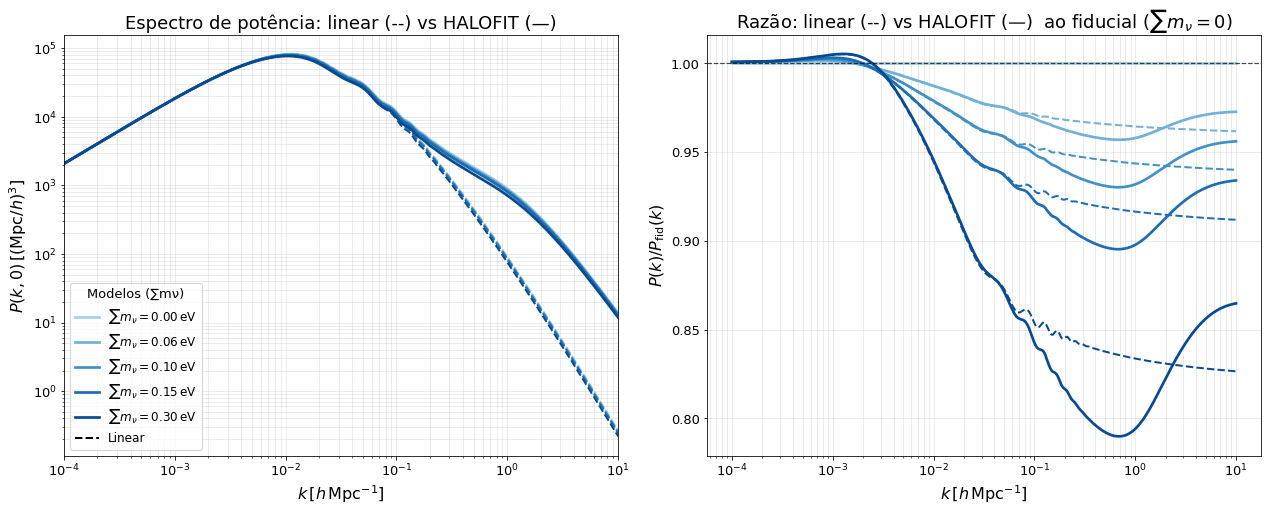

In [56]:
# CLASS: Ωm fixo, variação de ∑mν com Ω_cdm = Ω_m - Ω_b - Ω_ν
# Linear: usa pk_cb_lin (mν>0) e pk (mν=0)  |  Não linear (HALOFIT): pk_cb (mν>0) e pk (mν=0)
# Plot: linhas tracejadas = linear, linhas sólidas = não linear; razão no painel direito.

from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# ------------------------ Configuração cosmológica ------------------------
h_ref   = 0.67
Om_ref  = 0.315              # Ω_m FIXO
Ob_ref  = 0.049
ns_ref  = 0.965
A_s_ref = 2.1e-9             # fixamos A_s (não σ8) para expor supressão dependente de escala
tau_reio = 0.054

# lista de somas de massas (eV). O fiducial é 0.0 eV (massless)
mnu_list_eV = [0.00, 0.06, 0.10, 0.15, 0.30]
fid_mnu     = 0.00

# grade em k
P_k_max_h_Mpc = 20.0
k_per_decade  = 70
kmin, kmax = 1e-4, 10.0       # h/Mpc
Nk = 500
k_grid = np.logspace(np.log10(kmin), np.log10(kmax), Nk)

# ------------------------ Funções auxiliares ------------------------
def omega_nu_of_sum_mnu(sum_mnu_eV, h):
    """Ω_ν ≈ (∑m_ν / 93.14 eV) / h^2"""
    return (sum_mnu_eV / 93.14) / (h**2)

def build_params_sum_mnu(sum_mnu_eV, nonlinear=False):
    """Parâmetros do CLASS com Ω_cdm ajustado para manter Ω_m fixo.
       Se nonlinear=True, ativa HALOFIT.
    """
    Om_nu  = omega_nu_of_sum_mnu(sum_mnu_eV, h_ref)
    Om_cdm = Om_ref - Ob_ref - Om_nu
    if Om_cdm <= 0:
        raise ValueError(f"Ω_cdm<=0 para ∑mν={sum_mnu_eV:.3f} eV; reduza a massa ou aumente Ω_m.")
    pars = {
        'output': 'mPk',
        'gauge': 'Synchronous',
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': P_k_max_h_Mpc,
        'k_per_decade_for_pk': k_per_decade,
        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_cdm,            # fechado com Ω_m fixo
        'A_s': A_s_ref,
        'n_s': ns_ref,
        'tau_reio': tau_reio,
        'Omega_Lambda': 0, 'w0_fld': '-1.', 'wa_fld': '0.0',  # flat ΛCDM (fld)
    }
    if nonlinear:
        pars['non linear'] = 'halofit'
    if sum_mnu_eV == 0.0:
        pars.update({'N_ur': 3.046, 'N_ncdm': 0})
    else:
        m_i = sum_mnu_eV / 3.0
        pars.update({'N_ur': 0.046, 'N_ncdm': 3, 'm_ncdm': f"{m_i},{m_i},{m_i}"})
    return pars, Om_nu, Om_cdm

# ------------------------ Rodar CLASS (linear e HALOFIT) ------------------------
Pk_lin_map = {}
Pk_nl_map  = {}
for mnu in mnu_list_eV:
    # Linear
    pars_lin, _, _ = build_params_sum_mnu(mnu, nonlinear=False)
    cosmo_lin = Class(); cosmo_lin.set(pars_lin); cosmo_lin.compute()
    if mnu > 0.0:
        Pk_lin = np.array([cosmo_lin.pk_cb_lin(k=float(k), z=0.0) for k in k_grid])
    else:
        # Para mν=0, pk = pk_lin (total)
        Pk_lin = np.array([cosmo_lin.pk(k=float(k), z=0.0) for k in k_grid])
    Pk_lin_map[mnu] = Pk_lin

    # Não linear (HALOFIT)
    pars_nl, _, _ = build_params_sum_mnu(mnu, nonlinear=True)
    cosmo_nl = Class(); cosmo_nl.set(pars_nl); cosmo_nl.compute()
    if mnu > 0.0:
        Pk_nl = np.array([cosmo_nl.pk_cb(k=float(k), z=0.0) for k in k_grid])
    else:
        Pk_nl = np.array([cosmo_nl.pk(k=float(k), z=0.0) for k in k_grid])
    Pk_nl_map[mnu] = Pk_nl

# Fiduciais (massless)
Pk_lin_fid = Pk_lin_map[fid_mnu]
Pk_nl_fid  = Pk_nl_map[fid_mnu]

# ------------------------ Aparência e cores ------------------------
plt.rcParams.update({
    "font.size": 13, "axes.titlesize": 18, "axes.labelsize": 16,
    "xtick.labelsize": 13, "ytick.labelsize": 13, "legend.fontsize": 12
})
cmap_vals = np.linspace(0.35, 0.9, len(mnu_list_eV))
colors = [plt.cm.Blues(v) for v in cmap_vals]
ls_lin = '--'
ls_nl  = '-'

# ------------------------ Plots ------------------------
fig, axes = plt.subplots(1, 2, figsize=(17.5, 7), constrained_layout=True)

# Painel esquerdo: P(k,0) linear (tracejado) e HALOFIT (sólido)
for mnu, col in zip(mnu_list_eV, colors):
    # não linear (sólido)
    axes[0].loglog(k_grid, Pk_nl_map[mnu], lw=2.7, color=col,
                   label=rf"$\sum m_\nu={mnu:.2f}\,\mathrm{{eV}}$ (NL)")
    # linear (tracejado)
    axes[0].loglog(k_grid, Pk_lin_map[mnu], lw=2.0, color=col, ls=ls_lin)

axes[0].set_xlabel(r"$k\,[h\,\mathrm{Mpc}^{-1}]$")
axes[0].set_ylabel(r"$P(k, 0)\,[({\mathrm{Mpc}}/h)^3]$")
axes[0].set_xlim(kmin, kmax)
axes[0].set_title(r"Espectro de potência: linear (--) vs HALOFIT (—)")
axes[0].grid(True, which="both", alpha=0.3)

# Constrói legenda com apenas uma entrada por cor (NL) + um proxy para linear
from matplotlib.lines import Line2D
legend_lines = [Line2D([0],[0], color=col, lw=2.7, ls='-', label=rf"$\sum m_\nu={mnu:.2f}\,\mathrm{{eV}}$")
                for mnu, col in zip(mnu_list_eV, colors)]
legend_lines.append(Line2D([0],[0], color='k', lw=2.0, ls='--', label='Linear'))
axes[0].legend(handles=legend_lines, ncol=1, title=r"Modelos (∑mν)")

# Painel direito: razões vs fiducial (linear e não linear)
for mnu, col in zip(mnu_list_eV, colors):
    # não linear: sólido
    ratio_nl = Pk_nl_map[mnu] / Pk_nl_fid
    axes[1].semilogx(k_grid, ratio_nl, lw=2.7, color=col)
    # linear: tracejado
    ratio_lin = Pk_lin_map[mnu] / Pk_lin_fid
    axes[1].semilogx(k_grid, ratio_lin, lw=2.0, color=col, ls=ls_lin)

axes[1].axhline(1.0, color='k', lw=1.2, ls='--', alpha=0.7)
axes[1].set_xlabel(r"$k\,[h\,\mathrm{Mpc}^{-1}]$")
axes[1].set_ylabel(r"$P(k)/P_{\rm fid}(k)$")
axes[1].set_title(r"Razão: linear (--) vs HALOFIT (—)  ao fiducial ($\sum m_\nu=0$)")
axes[1].grid(True, which="both", alpha=0.3)

plt.show()



# Não-linearidades, HALOFIT e supressão por neutrinos massivos

## Ideia geral
Neutrinos massivos introduzem uma **fração de matéria livremente propagante** que não participa do colapso gravitacional abaixo da sua escala de *free–streaming*. No regime **linear**, o efeito dominante em pequenas escalas é uma **supressão** aproximadamente proporcional a $f_\nu$:
$
\frac{\Delta P_{\rm L}}{P_{\rm L}}\;\equiv\;\frac{P_{\rm L}^{(\sum m_\nu>0)}(k)-P_{\rm L}^{(\nu=0)}(k)}{P_{\rm L}^{(\nu=0)}(k)}
\;\simeq\;-\,8\,f_\nu
\quad (k\gg k_{\rm fs},\; f_\nu\ll1),
$
onde $f_\nu \equiv \Omega_\nu/\Omega_m$ e, utilmente, $\Omega_\nu h^2\simeq \sum m_\nu/93.14\,{\rm eV}$.

## Por que as **não-linearidades aumentam a supressão**?
À medida que a evolução torna-se **não-linear** (tipicamente $k\gtrsim 0.2{-}0.3\,h\,{\rm Mpc}^{-1}$ em $z\lesssim1$), o crescimento de estruturas é **acelerado** para a componente que pode colapsar (CDM+bárions), enquanto os neutrinos continuam **parcialmente desacoplados** gravitacionalmente nas mesmas escalas (devido à sua velocidade térmica remanescente $v_{\rm th}\simeq 150(1+z)\left[\frac{1\,\mathrm{eV}}{M_\nu}\right]\ \mathrm{km\,s^{-1}}$.). Isso **amplifica a diferença relativa** entre os cenários com e sem massas de neutrinos, de modo que a supressão $\Delta P/P$ em pequenas escalas

Heurística: o acoplamento não-linear realça o contraste de densidade onde **apenas uma fração $1-f_\nu$** da matéria efetivamente colapsa, enquanto a fração $f_\nu$ age como um “fundo” que **não realimenta** o crescimento local nessas escalas. O resultado é uma **supressão crescente com $k$** (até certo ponto) e **dependente de $z$**.

## HALOFIT: utilidade e limites de precisão
O **HALOFIT** é uma receita semi-empírica para obter $P_{\rm NL}(k)$ a partir de $P_{\rm L}(k)$. Para **neutrinos massivos**, versões atualizadas do HALOFIT (com correções específicas) atingem **precisão de alguns por cento** contra **simulações N-body com neutrinos como partículas** em escalas **quase lineares a moderadamente não-lineares** (tipicamente $k\lesssim 1\,h\,{\rm Mpc}^{-1}$, dependendo de $z$ e de $f_\nu$).

- Em linhas gerais, **até alguns $\%$** de erro relativo é frequentemente reportado nas faixas de $k$ e $z$ onde o HALOFIT foi **calibrado** com simulações que incluem neutrinos massivos.
- Em **escalas menores** (mais não lineares) e/ou para **valores maiores de $\sum m_\nu$** (logo $f_\nu$ maior), a acurácia **se degrada**: a supressão prevista pode **subestimar** (ou superestimar) os resultados de N-body, pois a dinâmica de acoplamento e *mode coupling* torna-se mais complexa que o *ansatz* do HALOFIT.

> Referência: C. Bird, M. Viel, M.G. Haehnelt, “Massive neutrinos and the non-linear matter power spectrum” (*MNRAS*, 420, 2551–2561, 2012), [arXiv:1109.4416](https://arxiv.org/abs/1109.4416) / [PDF](https://arxiv.org/pdf/1109.4416).  
> O trabalho mostra como incorporar neutrinos massivos de forma mais acurada no HALOFIT e quantifica o desempenho frente a N-body com neutrinos como partículas.

## Moral da história
- **Linear**: supressão $\sim -8f_\nu$ para $k\gg k_{\rm fs}$ e $f_\nu\ll 1$.
- **Não-linear**: a supressão **aumenta** com $k$ e depende de $z$; HALOFIT com correções para neutrinos é **útil** e **rápido**, mas a precisão é **limitada a alguns por cento** em faixas de $k$ e $z$ de calibração — **verifique** a validade para o seu regime e orçamento de $\sum m_\nu$.
- Para análises de alta precisão (p.ex. *Stage IV*), considere **validações dedicadas** (simulações N-body com neutrinos como partículas ou métodos híbridos) e/ou **emuladores** treinados nesses cenários.


# Espectro angular de *galaxy clustering* $ C_\ell^{gg} $

O espectro de potência angular das flutuações de galáxias é definido por

$$
\langle a_{\ell m}^g \, a_{\ell' m'}^{g*} \rangle
= C_\ell^{gg} \, \delta_{\ell \ell'} \, \delta_{m m'} ,
$$

onde os coeficientes de expansão $ a_{\ell m}^g $ são dados por

$$
a_{\ell m}^g = \int dz \, n(z) \, b(z)
\int \frac{d^3 \mathbf{k}}{(2\pi)^3} \,
\delta_m(\mathbf{k}, z) \, j_\ell[k \chi(z)] \, Y_{\ell m}^*(\hat{\mathbf{k}}),
$$

com:
- $ \delta_m(\mathbf{k}, z) $: contraste de densidade da matéria no espaço de Fourier,  
- $ n(z) $: distribuição normalizada de redshifts das galáxias,  
- $ b(z) $: bias linear,  
- $ j_\ell(x) $: função esférica de Bessel,  
- $ \chi(z) $: distância comóvel.

Usando a definição do espectro tridimensional da matéria

$$
\langle \delta_m(\mathbf{k}, z)\, \delta_m^*(\mathbf{k}', z') \rangle
= (2\pi)^3 \delta_D(\mathbf{k} - \mathbf{k}') \, P_m(k; z, z'),
$$

obtemos a forma geral:

$$
C_\ell^{gg} =
\int dz \int dz'\,
\frac{H(z)}{c} \frac{H(z')}{c}\,
n(z) b(z)\, n(z') b(z')\,
\int \frac{dk\,k^2}{2\pi^2}\,
P_m(k; z, z')\,
j_\ell[k\chi(z)]\, j_\ell[k\chi(z')].
$$

---

## Aproximação de **Limber**

Para multipolos altos $( \ell \gtrsim 10 $), as funções de Bessel $ j_\ell(k\chi) $ são fortemente picadas em torno de $ k\chi \simeq \ell + 1/2 $.  
A integral oscilatória pode então ser aproximada por uma delta de Dirac:

$$
\int k^2 dk \, j_\ell(k\chi)\, j_\ell(k\chi')
\simeq \frac{\pi}{2} \frac{\delta_D(\chi - \chi')}{\chi^2}.
$$

Substituindo isso na expressão geral, obtemos a **forma projetada**:

$$
C_\ell^{gg}
\simeq \int_0^{\infty} \frac{dz}{H(z)} \,
\frac{[b(z) \, n(z)]^2}{\chi^2(z)} \,
P_m\!\left(k = \frac{\ell + 1/2}{\chi(z)}, z \right).
$$

---

### Observações

- A aproximação de Limber reduz a dupla integral em $ (z, z') $ a uma única integral, tornando o cálculo computacionalmente simples.  
- É válida quando o integrando varia lentamente em $ z $ e para multipolos moderados/altos $( \ell \gtrsim 10 $).  
- Para grandes escalas (pequenos $ \ell $), a forma exata com as funções de Bessel deve ser usada, pois correlações entre diferentes $ z $ tornam-se importantes.

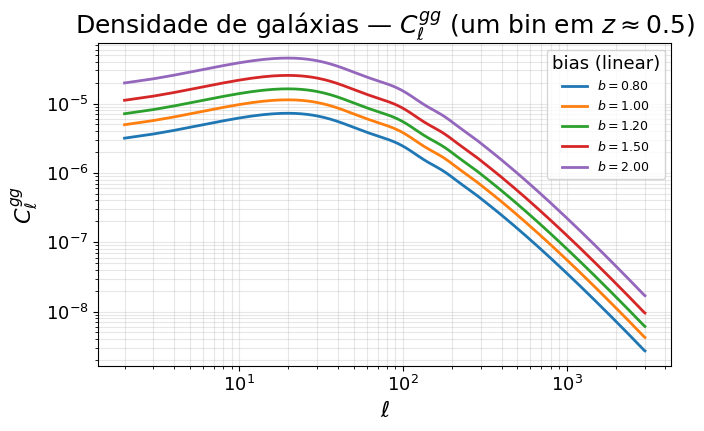

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# -------------------------------
# Configurações fixas do setup
# -------------------------------
lmax = 3000
bias_list = [0.8, 1.0, 1.2, 1.5, 2.0]   # 5 valores de bias

base_params = {
    # Saídas (inclui o necessário p/ LSS & CMB lensing)
    'modes': 's',
    'output': 'tCl, pCl, lCl, mPk, nCl, dCl',
    'lensing': 'yes',
    'l_max_scalars': 3000,
    'l_max_lss': 3000,
    'number_count_contributions': 'density',

    # Energia escura via fld
    'Omega_Lambda': 0,
    'w0_fld': '-1.',
    'wa_fld': '0.0',

    # Normalização e espectro primordial
    'sigma8': sig8_ref,
    'n_s': ns_ref,

    # Verbosidade e gauge
    'background_verbose': 0,
    'perturbations_verbose': 0,
    'gauge': 'Synchronous',

    # P(k) linear
    'z_pk': '1.0, 0.0',
    'P_k_max_h/Mpc': P_k_max_h_Mpc,
    'k_per_decade_for_pk': k_per_decade,

    # Fundo
    'h': h_ref,
    'Omega_b': Ob_ref,
    'Omega_cdm': Om_ref - Ob_ref,

    # Seleção LSS (um bin gaussian em z=0.5)
    'selection': 'gaussian',
    'selection_mean': '0.5',
    'selection_width': '0.1',

    # Obs.: NÃO fixamos o bias aqui: vamos variar no loop abaixo
}



# ---------------------------------
# Plot: 5 curvas de C_ell^{gg}
# ---------------------------------
plt.figure(figsize=(7, 4.5))
for b in bias_list:
    ell, clgg = results_gg[b]
    # Ignora l=0,1 para evitar singularidades/ruído visual
    plt.loglog(ell[2:], clgg[2:], lw=2, label=fr"$b={b:.2f}$")

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{gg}$')
plt.title(r'Densidade de galáxias — $C_\ell^{gg}$ (um bin em $z\approx 0.5$)')
plt.grid(True, which="both", alpha=0.3)
plt.legend(title="bias (linear)", fontsize=9)
plt.tight_layout()
plt.show()


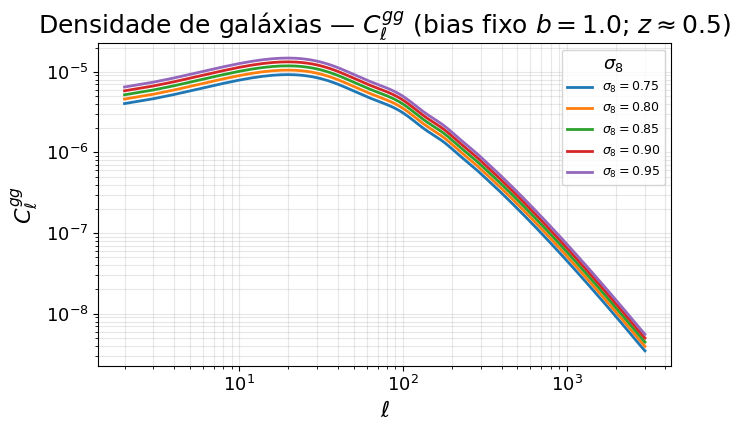

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# -------------------------------
# Configurações do sweep
# -------------------------------
sig8_list = [0.75, 0.80, 0.85, 0.90, 0.95]  # 5 valores de sigma8
bias_fixed = 1.0
lmax = 3000

# -------------------------------
# Parâmetros base (fixos)
# -------------------------------
base_params = {
    # Saídas necessárias (CMB + LSS)
    'modes': 's',
    'output': 'tCl, pCl, lCl, mPk, nCl, dCl',
    'lensing': 'yes',
    'l_max_scalars': 3000,
    'l_max_lss': 3000,
    'number_count_contributions': 'density',

    # Energia escura via fld
    'Omega_Lambda': 0,
    'w0_fld': '-1.',
    'wa_fld': '0.0',

    # Espectro primordial (n_s fixo; sigma8 varia no loop)
    'n_s': ns_ref,

    # Verbosidade e gauge
    'background_verbose': 0,
    'perturbations_verbose': 0,
    'gauge': 'Synchronous',

    # P(k) linear
    'z_pk': '1.0, 0.0',
    'P_k_max_h/Mpc': P_k_max_h_Mpc,
    'k_per_decade_for_pk': k_per_decade,

    # Fundo
    'h': h_ref,
    'Omega_b': Ob_ref,
    'Omega_cdm': Om_ref - Ob_ref,

    # Seleção LSS (um bin gaussian em z=0.5)
    'selection': 'gaussian',
    'selection_mean': '0.5',
    'selection_width': '0.1',
}

def run_one_sigma8(sig8_value, bias_value=1.0):
    """
    Roda o CLASS para um sigma8 e bias dados.
    Tenta 'selection_bias' e, se não existir, usa 'bias'.
    Retorna (ell, Cl_gg, cosmo).
    """
    for bias_key in ('selection_bias', 'bias'):
        cosmo = Class()
        params = base_params.copy()
        params['sigma8'] = float(sig8_value)
        params[bias_key] = str(bias_value)  # alguns builds exigem string em listas/por-bin

        try:
            cosmo.set(params)
            cosmo.compute()
        except Exception as e:
            if bias_key == 'selection_bias':
                # tenta com 'bias' na próxima iteração
                # print(f"[info] Falhou com selection_bias ({e}), tentando 'bias'…")
                continue
            else:
                raise  # falhou também com 'bias'
        # OK: extrair Cl^{gg}
        cl_dens = cosmo.density_cl(lmax)

        # Formato aninhado (ex.: cl_dens['dd']['dens[1]-dens[1]'])
        if 'dd' in cl_dens and isinstance(cl_dens['dd'], dict):
            if 'dens[1]-dens[1]' in cl_dens['dd']:
                Cl_gg = cl_dens['dd']['dens[1]-dens[1]']
            else:
                # fallback: usa o primeiro espectro de densidade disponível
                Cl_gg = list(cl_dens['dd'].values())[0]
            ell = np.arange(len(Cl_gg))
        else:
            # Formato “plano”: chaves tipo 'dd_1_1', 'density_1_1', ...
            gg_keys = [k for k in cl_dens.keys()
                       if ('_1_1' in k) and any(tag in k for tag in ['dd', 'density', 'number_count'])]
            if not gg_keys:
                gg_keys = [k for k in cl_dens.keys()
                           if 'density' in k or 'number_count' in k or k.startswith('dd')]
            if not gg_keys:
                raise RuntimeError("Não encontrei Cl^{gg} em density_cl(); inspecione chaves com print(cl_dens.keys()).")
            Cl_gg = cl_dens[gg_keys[0]]
            ell = cl_dens.get('ell', np.arange(len(Cl_gg)))

        return ell, np.asarray(Cl_gg), cosmo

    # se não retornar dentro do laço:
    raise RuntimeError("Falha ao configurar o bias (nem 'selection_bias' nem 'bias' funcionaram).")

# -------------------------------
# Rodar para todos os sigma8
# -------------------------------
results_gg = {}  # sigma8 -> (ell, Cl_gg)
for s8 in sig8_list:
    ell, clgg, _ = run_one_sigma8(s8, bias_fixed)
    results_gg[s8] = (ell, clgg)

# -------------------------------
# Plot: 5 curvas de C_ell^{gg}
# -------------------------------
plt.figure(figsize=(7, 4.5))
for s8 in sig8_list:
    ell, clgg = results_gg[s8]
    plt.loglog(ell[2:], clgg[2:], lw=2, label=fr"$\sigma_8={s8:.2f}$")

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{gg}$')
plt.title(rf'Densidade de galáxias — $C_\ell^{{gg}}$ (bias fixo $b={bias_fixed:.1f}$; $z\approx 0.5$)')
plt.grid(True, which="both", alpha=0.3)
plt.legend(title=r"$\sigma_8$", fontsize=9)
plt.tight_layout()
plt.show()


In [16]:
import numpy as np
from classy import Class

# ===========================
# Parâmetros fixos
# ===========================
h_ref   = 0.67
Ob_ref  = 0.049
Om_ref0 = 0.30           # Ω_m central
ns_ref  = 0.965
sig8_0  = 0.85
lmax    = 3000

# Seleção (um bin em z~0.5)
z_mean  = 0.5
z_width = 0.1

# Grades centrais
bias_grid = [0.8, 1.0, 1.2]
sig8_grid = [0.80, 0.85, 0.90]
Om_grid   = [0.25, 0.30, 0.35]

# ===========================
# Helpers
# ===========================
def build_base_params(sig8, Om_m, bias=1.0):
    """Monta dicionário de parâmetros para um caso."""
    return {
        # CMB + LSS
        'modes': 's',
        'output': 'tCl, pCl, lCl, mPk, nCl, dCl',
        'lensing': 'yes',
        'l_max_scalars': lmax,
        'l_max_lss':     lmax,
        'number_count_contributions': 'density',

        # DE via fld (plano; CLASS fecha Ω_fld)
        'Omega_Lambda': 0,
        'Omega_k': 0,
        'w0_fld': '-1.',
        'wa_fld': '0.0',

        # Primordial
        'n_s': ns_ref,
        'sigma8': float(sig8),

        # Gauge/verbosidade
        'gauge': 'Synchronous',
        'background_verbose': 0,
        'perturbations_verbose': 0,

        # P(k)
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': 5.0,
        'k_per_decade_for_pk': 50,

        # Fundo
        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_m - Ob_ref,

        # LSS: um bin
        'selection': 'gaussian',
        'selection_mean': str(z_mean),
        'selection_width': str(z_width),
        #'non_diagonal': 0,           # <<-- nome correto
        'selection_bias': str(bias), # <<-- use SEMPRE selection_bias
        'N_ur': 3.046,
        'N_ncdm': 0,
    }

def run_clgg(sig8, Om_m, bias=1.0):
    """Executa CLASS e retorna (ell, Cl_ell^{gg}) para o primeiro bin."""
    params = build_base_params(sig8, Om_m, bias=bias)
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()

    cl_dens = cosmo.density_cl(lmax)

    # Formato novo (aninhado): cl_dens['dd']['dens[1]-dens[1]']
    if 'dd' in cl_dens and isinstance(cl_dens['dd'], dict):
        if 'dens[1]-dens[1]' in cl_dens['dd']:
            Cl_gg = np.asarray(cl_dens['dd']['dens[1]-dens[1]'])
        else:
            Cl_gg = np.asarray(list(cl_dens['dd'].values())[0])
        ell = np.arange(len(Cl_gg))
    else:
        # Formato antigo (plano): dd_1_1 / density_1_1 / number_count_1_1
        keys = [k for k in cl_dens.keys()
                if ('_1_1' in k) and any(t in k for t in ['dd', 'density', 'number_count'])]
        if not keys:
            keys = [k for k in cl_dens.keys()
                    if 'density' in k or 'number_count' in k or k.startswith('dd')]
        if not keys:
            raise RuntimeError("Não encontrei Cl^{gg} em density_cl(). Inspecione as chaves.")
        Cl_gg = np.asarray(cl_dens[keys[0]])
        ell = np.asarray(cl_dens.get('ell', np.arange(len(Cl_gg))))

    return ell, Cl_gg

def central_derivative(param_name, grid, fixed):
    """
    Derivada central de C_ell^{gg} em relação a 'param_name' ∈ {'bias','sigma8','Omega_m'}.
    'grid' = [x-h, x, x+h]; 'fixed' contém os outros parâmetros fixos.
    Retorna: (ell, dCl/dp, Cl_no_ponto_central)
    """
    x_minus, x0, x_plus = grid

    def eval_at(vals):
        return run_clgg(sig8=vals['sigma8'], Om_m=vals['Omega_m'], bias=vals['bias'])

    args_minus = fixed.copy(); args_minus[param_name] = x_minus
    args_0     = fixed.copy(); args_0[param_name]     = x0
    args_plus  = fixed.copy(); args_plus[param_name]  = x_plus

    ell, Cl_minus = eval_at(args_minus)
    _,   Cl_0     = eval_at(args_0)
    _,   Cl_plus  = eval_at(args_plus)

    h = x_plus - x_minus
    dCl_dp = (Cl_plus - Cl_minus) / h
    return ell, dCl_dp, Cl_0

def to_log_derivative(ell, dCl_dp, Cl, p0):
    """Retorna ∂ln C_ell/∂p e p * ∂ln C_ell/∂p."""
    eps = 1e-300
    dlnCl_dp = dCl_dp / np.maximum(Cl, eps)
    return dlnCl_dp, p0 * dlnCl_dp

# ===========================
# Derivadas
# ===========================
fixed_central = {'bias': 1.0, 'sigma8': sig8_0, 'Omega_m': Om_ref0}

# 1) dC/d(bias)
ell_b, dCl_db, Cl_b = central_derivative('bias', bias_grid, fixed=fixed_central)
dlnCl_db, b_times_dlnCl_db = to_log_derivative(ell_b, dCl_db, Cl_b, fixed_central['bias'])

# 2) dC/d(sigma8)
ell_s8, dCl_ds8, Cl_s8 = central_derivative('sigma8', sig8_grid, fixed=fixed_central)
dlnCl_ds8, s8_times_dlnCl_ds8 = to_log_derivative(ell_s8, dCl_ds8, Cl_s8, fixed_central['sigma8'])

# 3) dC/d(Omega_m)
ell_Om, dCl_dOm, Cl_Om = central_derivative('Omega_m', Om_grid, fixed=fixed_central)
dlnCl_dOm, Om_times_dlnCl_dOm = to_log_derivative(ell_Om, dCl_dOm, Cl_Om, fixed_central['Omega_m'])

# (Opcional) inspeção rápida:
# print("ell[:5] =", ell_b[:5])
# print("dlnCl/dbias[:5] =", dlnCl_db[:5])

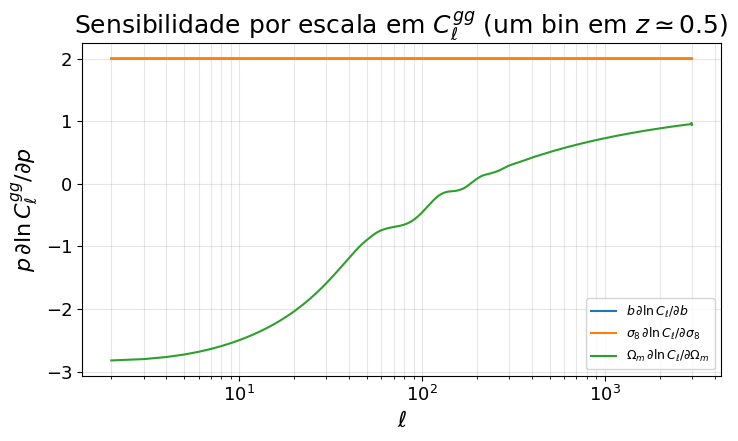

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Preparar um eixo ℓ comum e interpolar (robusto a diferenças)
# ----------------------------------------------------------
lmin = max(ell_b.min(), ell_s8.min(), ell_Om.min(), 2)          # começa em ℓ=2
lmax_common = min(ell_b.max(), ell_s8.max(), ell_Om.max())
ell_common = np.arange(int(lmin), int(lmax_common)+1)

def interp_to_common(ell_src, y_src):
    # interpola linearmente nos inteiros de ℓ (supondo ell_src crescente)
    return np.interp(ell_common, ell_src, y_src)

y_b   = interp_to_common(ell_b,   b_times_dlnCl_db)
y_s8  = interp_to_common(ell_s8,  s8_times_dlnCl_ds8)
y_Om  = interp_to_common(ell_Om,  Om_times_dlnCl_dOm)

# ----------------------------------------------------------
# Plot único: p * d ln C_ell / d p para b, sigma8 e Omega_m
# ----------------------------------------------------------
plt.figure(figsize=(7.5, 4.6))
plt.semilogx(ell_common, y_b,  label=r"$b\,\partial\ln C_\ell/\partial b$")
plt.semilogx(ell_common, y_s8, label=r"$\sigma_8\,\partial\ln C_\ell/\partial \sigma_8$")
plt.semilogx(ell_common, y_Om, label=r"$\Omega_m\,\partial\ln C_\ell/\partial \Omega_m$")

plt.xlabel(r'$\ell$')
plt.ylabel(r'$p\,\partial\ln C_\ell^{gg}/\partial p$')
plt.title(r"Sensibilidade por escala em $C_\ell^{gg}$ (um bin em $z\simeq0.5$)")
plt.grid(True, which="both", alpha=0.3)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


## 🧩 1. Regime linear: proporcionalidades exatas

 No regime linear da teoria de perturbações:

$
\delta_g(\mathbf{k}, z) = b\,\delta_m(\mathbf{k}, z)
$


$P_{gg}(k, z) = b^2\,P_{mm}(k, z)$


e o espectro angular de número de galáxias (densidade projetada em redshift \(z_i\)) é:

$
C_\ell^{gg} = \int \frac{dz}{H(z)\,r^2(z)}\, W_g^2(z)\, P_{mm}\!\left(k=\frac{\ell+1/2}{r(z)}, z\right) b^2
$

ou seja, $**(C_\ell^{gg} \propto b^2\,P_{mm})**$.

Além disso, $P_{mm}(k,z)$ no regime linear escala com a **variância da densidade** $\sigma_8^2$:

$
P_{mm}(k,z) \propto \sigma_8^2\,D^2(z)\,T^2(k)
$

onde $D(z)$ é o fator de crescimento linear.  
Portanto,

$
C_\ell^{gg} \propto (b\,\sigma_8)^2
$

e derivando o logaritmo:

$
\frac{\partial\ln C_\ell^{gg}}{\partial\ln b} = 2
\qquad\text{e}\qquad
\frac{\partial\ln C_\ell^{gg}}{\partial\ln \sigma_8} = 2
$

Isso explica por que, no gráfico, as curvas de **bias** e **σ₈** aparecem próximas de 2:  
é uma consequência direta do regime linear, onde ambas entram **quadraticamente** no espectro angular.


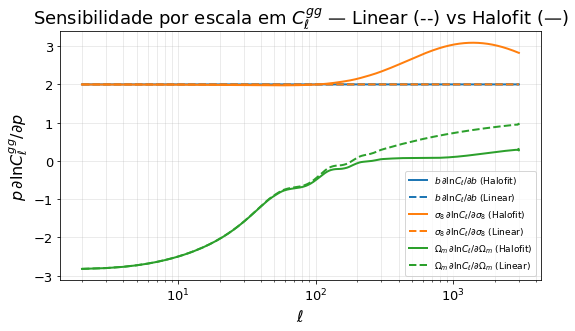

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# -------------------------------
# Constantes/centrais
# -------------------------------
h_ref   = 0.67
Ob_ref  = 0.049
Om_ref0 = 0.30
ns_ref  = 0.965
sig8_0  = 0.85
lmax    = 3000

# Seleção (um bin)
z_mean, z_width = 0.5, 0.1

# Grades (centrais, 3 pontos)
bias_grid = [0.8, 1.0, 1.2]      # h_b = 0.2
sig8_grid = [0.80, 0.85, 0.90]   # h_s8 = 0.05
Om_grid   = [0.25, 0.30, 0.35]   # h_Om = 0.05

# -------------------------------
# Helpers
# -------------------------------
def base_params(sig8, Om_m, bias, non_linear_mode):
    """Dicionário de parâmetros para um caso."""
    return {
        # CMB + LSS
        'modes': 's',
        'output': 'tCl, pCl, lCl, mPk, nCl, dCl',
        'lensing': 'yes',
        'l_max_scalars': lmax,
        'l_max_lss':     lmax,
        'number_count_contributions': 'density',

        # Linear x Não linear
        'non linear': non_linear_mode,   # 'none' ou 'halofit'

        # DE via fld (plano)
        'Omega_Lambda': 0,
        'Omega_k': 0,
        'w0_fld': '-1.',
        'wa_fld': '0.0',

        # Primordial
        'n_s': ns_ref,
        'sigma8': float(sig8),

        # Gauge/verbosidade
        'gauge': 'Synchronous',
        'background_verbose': 0,
        'perturbations_verbose': 0,

        # P(k)
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': 5.0,
        'k_per_decade_for_pk': 50,

        # Fundo
        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_m - Ob_ref,

        # LSS (um bin)
        'selection': 'gaussian',
        'selection_mean': str(z_mean),
        'selection_width': str(z_width),
       # 'non_diag': 1,
        'selection_bias': str(bias),

        # Neutrinos (todos sem massa para isolar efeito)
        'N_ur': 3.046,
        'N_ncdm': 0,
    }

def clgg(sig8, Om_m, bias, non_linear_mode):
    """Retorna (ell, C_ell^{gg}) do primeiro bin."""
    cosmo = Class()
    cosmo.set(base_params(sig8, Om_m, bias, non_linear_mode))
    cosmo.compute()
    cl = cosmo.density_cl(lmax)

    # Novo formato: cl['dd']['dens[1]-dens[1]']; antigo: 'dd_1_1' etc.
    if 'dd' in cl and isinstance(cl['dd'], dict):
        arr = np.asarray(cl['dd'].get('dens[1]-dens[1]',
                                      list(cl['dd'].values())[0]))
        ell = np.arange(arr.size)
        return ell, arr
    else:
        keys = [k for k in cl if ('_1_1' in k) and any(t in k for t in ['dd','density','number_count'])]
        if not keys:
            keys = [k for k in cl if 'density' in k or 'number_count' in k or str(k).startswith('dd')]
        arr = np.asarray(cl[keys[0]])
        ell = np.asarray(cl.get('ell', np.arange(arr.size)))
        return ell, arr

def central_derivative(param, grid, fixed, non_linear_mode):
    """Diferença finita central de C_l^{gg} vs param."""
    x_minus, x0, x_plus = grid
    def eval_at(vals):
        return clgg(vals['sigma8'], vals['Omega_m'], vals['bias'], non_linear_mode)

    vm = fixed.copy(); vm[param] = x_minus
    v0 = fixed.copy(); v0[param] = x0
    vp = fixed.copy(); vp[param] = x_plus

    ell, C_m = eval_at(vm)
    _,   C_0 = eval_at(v0)
    _,   C_p = eval_at(vp)

    h = x_plus - x_minus
    dCdp = (C_p - C_m) / h
    return ell, dCdp, C_0

def to_log_sensitivity(ell, dCdp, C, p0):
    eps = 1e-300
    dlnC_dp = dCdp / np.maximum(C, eps)
    return p0 * dlnC_dp

# -------------------------------
# Derivadas: Linear vs Halofit
# -------------------------------
fixed = {'bias': 1.0, 'sigma8': sig8_0, 'Omega_m': Om_ref0}

# Linear
ell_b_L, dCdb_L, Cb_L   = central_derivative('bias',    bias_grid, fixed, 'none')
ell_s8_L, dCds8_L, Cs_L = central_derivative('sigma8',  sig8_grid, fixed, 'none')
ell_Om_L, dCdOm_L, CO_L = central_derivative('Omega_m', Om_grid,   fixed, 'none')

# Halofit
ell_b_H, dCdb_H, Cb_H   = central_derivative('bias',    bias_grid, fixed, 'halofit')
ell_s8_H, dCds8_H, Cs_H = central_derivative('sigma8',  sig8_grid, fixed, 'halofit')
ell_Om_H, dCdOm_H, CO_H = central_derivative('Omega_m', Om_grid,   fixed, 'halofit')

# Sensibilidades adimensionais p * d ln C / d p
Sb_L  = to_log_sensitivity(ell_b_L,  dCdb_L,  Cb_L, fixed['bias'])
Ss_L  = to_log_sensitivity(ell_s8_L, dCds8_L, Cs_L, fixed['sigma8'])
SO_L  = to_log_sensitivity(ell_Om_L, dCdOm_L, CO_L, fixed['Omega_m'])

Sb_H  = to_log_sensitivity(ell_b_H,  dCdb_H,  Cb_H, fixed['bias'])
Ss_H  = to_log_sensitivity(ell_s8_H, dCds8_H, Cs_H, fixed['sigma8'])
SO_H  = to_log_sensitivity(ell_Om_H, dCdOm_H, CO_H, fixed['Omega_m'])

# -------------------------------
# Eixo comum de ℓ e interpolação
# -------------------------------
lmin = max(2, ell_b_L.min(), ell_s8_L.min(), ell_Om_L.min(),
              ell_b_H.min(), ell_s8_H.min(), ell_Om_H.min())
lmax_c = min(ell_b_L.max(), ell_s8_L.max(), ell_Om_L.max(),
             ell_b_H.max(), ell_s8_H.max(), ell_Om_H.max())
ell_c = np.arange(int(lmin), int(lmax_c)+1)

def interp(ell_src, y_src):
    return np.interp(ell_c, ell_src, y_src)

Sb_Li, Ss_Li, SO_Li = interp(ell_b_L, Sb_L), interp(ell_s8_L, Ss_L), interp(ell_Om_L, SO_L)
Sb_Hi, Ss_Hi, SO_Hi = interp(ell_b_H, Sb_H), interp(ell_s8_H, Ss_H), interp(ell_Om_H, SO_H)

# -------------------------------
# Plot único: sólido = Halofit, pontilhado = Linear
# -------------------------------
plt.figure(figsize=(7.8, 4.8))

# Bias (mesma cor para L/H)
line_b,   = plt.semilogx(ell_c, Sb_Hi, lw=2, label=r"$b\,\partial\ln C_\ell/\partial b$ (Halofit)")
plt.semilogx(ell_c, Sb_Li, lw=2, ls="--", color=line_b.get_color(),
             label=r"$b\,\partial\ln C_\ell/\partial b$ (Linear)")

# Sigma8
line_s,   = plt.semilogx(ell_c, Ss_Hi, lw=2, label=r"$\sigma_8\,\partial\ln C_\ell/\partial \sigma_8$ (Halofit)")
plt.semilogx(ell_c, Ss_Li, lw=2, ls="--", color=line_s.get_color(),
             label=r"$\sigma_8\,\partial\ln C_\ell/\partial \sigma_8$ (Linear)")

# Omega_m
line_o,   = plt.semilogx(ell_c, SO_Hi, lw=2, label=r"$\Omega_m\,\partial\ln C_\ell/\partial \Omega_m$ (Halofit)")
plt.semilogx(ell_c, SO_Li, lw=2, ls="--", color=line_o.get_color(),
             label=r"$\Omega_m\,\partial\ln C_\ell/\partial \Omega_m$ (Linear)")

plt.xlabel(r'$\ell$')
plt.ylabel(r'$p\,\partial\ln C_\ell^{gg}/\partial p$')
plt.title(r"Sensibilidade por escala em $C_\ell^{gg}$ — Linear (--) vs Halofit (—)")
plt.grid(True, which="both", alpha=0.3)
plt.legend(ncol=1, fontsize=9)
plt.tight_layout()
plt.show()


## 🧮 Construção da Matriz de Fisher em \( C_\ell^{gg} \)

A matriz de Fisher é uma ferramenta que quantifica **o poder de um conjunto de observáveis para
constranger parâmetros cosmológicos**.  
Para o espectro angular de galáxias $ C_\ell^{gg} $, ela mede como as variações em parâmetros como
$\sigma_8$, $\Omega_m$ e $b$ (bias) afetam as observações esperadas.

---

### 1️⃣ Definição geral

No caso gaussiano e considerando apenas o **auto-espectro angular** de um bin de galáxias, a
matriz de Fisher é dada por:

$
F_{ij} = \sum_{\ell=\ell_{\min}}^{\ell_{\max}} 
    \frac{2\ell + 1}{2} f_{\rm sky}
    \frac{\partial C_\ell}{\partial \theta_i}
    \frac{\partial C_\ell}{\partial \theta_j}
    \frac{1}{(C_\ell + N_\ell)^2}
$

onde:

- $f_{\rm sky}$ é a fração do céu coberta pelo levantamento;
- $C_\ell$ é o espectro teórico do sinal;
- $N_\ell$ é o **ruído de shot noise** (veja abaixo);
- $\partial C_\ell / \partial \theta_i$ são as derivadas numéricas em relação a cada parâmetro.

O **inverso da matriz de Fisher** fornece uma estimativa da **matriz de covariância** dos parâmetros:

$
\mathrm{Cov} = F^{-1}
$

e os erros 1σ marginais são as raízes das diagonais:
    
$
\sigma(\theta_i) = \sqrt{(\mathrm{Cov})_{ii}}.
$

---

### 2️⃣ Ruído de shot noise

Em levantamentos de galáxias, as flutuações de contagem seguem estatística de Poisson.
O ruído de shot noise é então aproximadamente **branco** (independente de $\ell$):

$
N_\ell = \frac{1}{\bar{n}}
$

onde:

- $\bar{n}$ é a **densidade superficial de galáxias** em **sr$^{-1}$**.

Se a densidade for fornecida em galáxias por arcmin\(^2\), convertemos para steradianos via:

$
\bar{n}_{\rm sr} = \bar{n}_{\rm arcmin^{-2}} \times (60\times180/\pi)^2.
$

Assim, quanto maior a densidade de galáxias (menor $N_\ell$), **melhor a sensibilidade** aos parâmetros.

---

### 3️⃣ Derivadas numéricas por diferença finita

As derivadas de $C_\ell$ em relação a cada parâmetro $\theta_i$ são obtidas numericamente:

$
\frac{\partial C_\ell}{\partial \theta_i} 
\simeq \frac{C_\ell(\theta_i + \Delta_i) - C_\ell(\theta_i - \Delta_i)}{2\,\Delta_i}.
$

No código, cada derivada é avaliada mantendo os outros parâmetros fixos
(ex.: variar apenas $\sigma_8$ com $\Omega_m$ e $b$ fixos).

Essas derivadas são então combinadas para formar $F_{ij}$ segundo a equação da seção anterior.

---

### 4️⃣ Marginalização sobre o bias \(b\)

Quando incluímos o **bias das galáxias** como um parâmetro adicional,
a Fisher completa tem dimensão \(3\times3\):

$
F =
\begin{pmatrix}
F_{\sigma_8\sigma_8} & F_{\sigma_8\Omega_m} & F_{\sigma_8 b} \\
F_{\sigma_8\Omega_m} & F_{\Omega_m\Omega_m} & F_{\Omega_m b} \\
F_{\sigma_8 b} & F_{\Omega_m b} & F_{bb}
\end{pmatrix}.
$

Para obter as **restrições marginais apenas em** \((\sigma_8, \Omega_m)\),
integramos (ou marginalizamos) sobre \(b\).
Isso é feito invertendo a Fisher completa para obter a covariância:

$
\mathrm{Cov}_3 = F^{-1},
$

e tomando o **subbloco** correspondente aos parâmetros de interesse:

$
\mathrm{Cov}_2 = 
\begin{pmatrix}
\mathrm{Cov}_3[0,0] & \mathrm{Cov}_3[0,1] \\
\mathrm{Cov}_3[1,0] & \mathrm{Cov}_3[1,1]
\end{pmatrix}.
$

O Fisher marginalizado é simplesmente o inverso desse subbloco:

$
F^{\rm (marg)} = \mathrm{Cov}_2^{-1}.
$

---

### 5️⃣ Elipse de confiança conjunta

A **elipse 1σ (68% CL)** no plano $\sigma_8, \Omega_m$ é obtida a partir da covariância marginalizada.
A fronteira da elipse corresponde a:

$
\Delta\chi^2 = 2.30
$

para 2 graus de liberdade.

As direções e eixos principais são dados pelos autovetores e autovalores da covariância.
Os semi-eixos são $a = \sqrt{\lambda_1 \Delta\chi^2}$ e $b = \sqrt{\lambda_2 \Delta\chi^2}$.

---

### 6️⃣ Resumo intuitivo

- $F_{ij}$ mede **quanta informação** o espectro angular contém sobre cada par de parâmetros.  
- $N_\ell = 1/\bar{n}$ adiciona **ruído estatístico** (flutuações de contagem).  
- A inversão $F^{-1}$ dá a **covariância esperada**.  
- A marginalização sobre $b$ remove a informação associada ao bias,  
  resultando em **restrições degradadas** em $\sigma_8$ e $\Omega_m$.  
- A elipse final mostra **correlação e degeneração** entre os dois parâmetros cosmológicos.


## 🎯 Cálculo de desvios padrão (1σ, 2σ) e correlação entre parâmetros

Depois de calcular a **matriz de Fisher** $F_{ij}$ e inverter para obter a **matriz de covariância**:

$
\mathrm{Cov} = F^{-1},
$

podemos extrair diretamente as incertezas marginais e correlações entre parâmetros.

---

### 1️⃣ Desvios padrão 1σ e 2σ

A incerteza marginal (1σ) em cada parâmetro $\theta_i$ é o desvio padrão obtido da diagonal da matriz de covariância:

$
\sigma(\theta_i) = \sqrt{(\mathrm{Cov})_{ii}}.
$

Esses valores correspondem ao **intervalo de confiança de 68% (1σ)** para uma distribuição gaussiana univariada.

Para o intervalo de **95% (2σ)**, basta multiplicar por o fator de conversão apropriado (aproximadamente 2):

$
\sigma_{2\sigma}(\theta_i) \approx 2 \times \sigma(\theta_i).
$

> ⚠️ Observação:
> - O fator “2” é uma boa aproximação quando as distribuições são gaussianas e bem comportadas.
> - Em análises mais rigorosas, pode-se usar o fator exato de$ \sqrt{\Delta\chi^2} $ para 95% CL:
>   - 1 parâmetro → $ \Delta\chi^2 = 3.84 $
>   - 2 parâmetros → $ \Delta\chi^2 = 5.99 $

Assim:
$
\sigma_{2\sigma} = \sqrt{5.99 / 2.30} \times \sigma_{1\sigma} \approx 1.61 \times \sigma_{1\sigma}
$
para o caso de dois parâmetros correlacionados (como $\sigma_8$ e $\Omega_m$).

---

### 2️⃣ Correlação entre parâmetros

A correlação linear entre dois parâmetros $\theta_i$ e $\theta_j$ é medida pelo **coeficiente de correlação de Pearson** derivado da covariância:

$
\rho_{ij} = \frac{\mathrm{Cov}_{ij}}{\sqrt{\mathrm{Cov}_{ii}\,\mathrm{Cov}_{jj}}}.
$

O valor de $\rho_{ij}$ varia entre:
- $+1$: correlação positiva perfeita (os parâmetros variam juntos);
- $0$: não correlacionados;
- $-1$: correlação negativa perfeita (anticorrelacionados).

Em cosmologia, correlações elevadas (|$\rho_{ij}$| ≳ 0.8) indicam **degenerações** — por exemplo, entre $\sigma_8$ e $\Omega_m$, que ambos modulam a amplitude do espectro de potência.

---

### 3️⃣ Resumo prático no código

No código Python, se `Cov` for sua matriz de covariância (obtida como `np.linalg.inv(F)`), então:

```python
import numpy as np

# Erros marginais (1σ)
sigma = np.sqrt(np.diag(Cov))

# Correlação entre parâmetros i,j
rho_ij = Cov[i,j] / (sigma[i] * sigma[j])

# 2σ (95%) para um único parâmetro
sigma_2sigma = 2.0 * sigma  # aproximação

# Para o caso 2D (elipse de 68% e 95%)
delta_chi2_68 = 2.30  # 68% CL
delta_chi2_95 = 5.99  # 95% CL
ratio_2sigma = np.sqrt(delta_chi2_95 / delta_chi2_68)  # ≈ 1.61


In [18]:
import numpy as np
from classy import Class

# ===========================
# Parâmetros do modelo/experimento
# ===========================
h_ref   = 0.67
Ob_ref  = 0.049
Om_cen  = 0.30          # ponto central Ω_m
ns_ref  = 0.965
s8_cen  = 0.85          # ponto central σ8
b_fixed = 1.0           # bias fixo (se quiser marginalizar, digo abaixo como mudar)
lmax    = 3000

# janela tomográfica (um bin)
z_mean, z_width = 0.5, 0.1

# modo linear vs não linear
nonlinear_mode = 'halofit'   # 'halofit' ou 'none'

# cobertura de céu e densidade de fontes
f_sky         = 0.35               # fração de céu
nbar_arcmin2  = 1.0                # gal/arcmin^2 (ajuste!)
arcmin2_to_sr = (60.0*180.0/np.pi)**2
nbar_sr       = nbar_arcmin2 * arcmin2_to_sr

# cortes em multipolos
ell_min, ell_max = 2, 1500

# grades para diferenças finitas (centrais, 3 pontos)
s8_grid = [0.80, 0.85, 0.90]   # passo 0.05
Om_grid = [0.25, 0.30, 0.35]   # passo 0.05

# ===========================
# Helpers CLASS
# ===========================
def base_params(sig8, Om_m, bias, non_linear_mode):
    return {
        'modes': 's',
        'output': 'tCl, pCl, lCl, mPk, nCl, dCl',
        'lensing': 'yes',
        'l_max_scalars': lmax,
        'l_max_lss':     lmax,
        'number_count_contributions': 'density',
        'non linear': non_linear_mode,     # 'none' ou 'halofit'

        'Omega_Lambda': 0,
        'Omega_k': 0,
        'w0_fld': '-1.',
        'wa_fld': '0.0',

        'n_s': ns_ref,
        'sigma8': float(sig8),

        'gauge': 'Synchronous',
        'background_verbose': 0,
        'perturbations_verbose': 0,

        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': 5.0,
        'k_per_decade_for_pk': 50,

        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_m - Ob_ref,

        'selection': 'gaussian',
        'selection_mean': str(z_mean),
        'selection_width': str(z_width),
        #'non_diagonal': 0,
        'selection_bias': str(bias),

        'N_ur': 3.046,
        'N_ncdm': 0,
    }

def clgg(sig8, Om_m, bias, non_linear_mode):
    cosmo = Class()
    cosmo.set(base_params(sig8, Om_m, bias, non_linear_mode))
    cosmo.compute()
    cl = cosmo.density_cl(lmax)
    # formato novo (v3+): cl['dd']['dens[1]-dens[1]']
    if 'dd' in cl and isinstance(cl['dd'], dict):
        Cl = np.asarray(cl['dd'].get('dens[1]-dens[1]', list(cl['dd'].values())[0]))
        ell = np.arange(Cl.size)
    else:  # formato antigo
        keys = [k for k in cl if ('_1_1' in k) and any(t in k for t in ['dd','density','number_count'])]
        if not keys:
            keys = [k for k in cl if 'density' in k or 'number_count' in k or str(k).startswith('dd')]
        Cl  = np.asarray(cl[keys[0]])
        ell = np.asarray(cl.get('ell', np.arange(Cl.size)))
    return ell, Cl

def central_derivative(param, grid, fixed, non_linear_mode):
    x_minus, x0, x_plus = grid
    def eval_at(vals):
        return clgg(vals['sigma8'], vals['Omega_m'], vals['bias'], non_linear_mode)

    vm = fixed.copy(); vm[param] = x_minus
    v0 = fixed.copy(); v0[param] = x0
    vp = fixed.copy(); vp[param] = x_plus

    ell, C_m = eval_at(vm)
    _,   C_0 = eval_at(v0)
    _,   C_p = eval_at(vp)

    h = (x_plus - x_minus)
    dCdp = (C_p - C_m) / h
    return ell, C_0, dCdp

# ===========================
# Derivadas (no modo escolhido)
# ===========================
fixed = {'bias': b_fixed, 'sigma8': s8_cen, 'Omega_m': Om_cen}

ell_s8, C_cen_1, dC_ds8 = central_derivative('sigma8',  s8_grid, fixed, nonlinear_mode)
ell_Om,  C_cen_2, dC_dOm = central_derivative('Omega_m', Om_grid, fixed, nonlinear_mode)

# alinhar em um mesmo eixo ℓ
lmin_c = max(ell_min, max(ell_s8.min(), ell_Om.min()))
lmax_c = min(ell_max, min(ell_s8.max(), ell_Om.max()))
ell     = np.arange(int(lmin_c), int(lmax_c)+1)

def to_common(ell_src, arr_src):
    return np.interp(ell, ell_src, arr_src)

C_cen  = to_common(ell_s8, C_cen_1)  # (C_cen_1 e _2 devem ser ~iguais; usamos um)
dCds8  = to_common(ell_s8, dC_ds8)
dCdOm  = to_common(ell_Om, dC_dOm)

# ===========================
# Fisher 2×2 para {σ8, Ωm} com shot noise
# ===========================
N_ell   = 1.0 / nbar_sr
C_obs   = C_cen + N_ell
pref    = (2.0*ell + 1.0) * f_sky / 2.0
var     = (C_obs**2) * (2.0 / ((2.0*ell + 1.0) * f_sky))  # Cov(Cℓ,Cℓ) para um auto-espectro
# Forma equivalente direta do Fisher:
F11 = np.sum(pref * (dCds8 * dCds8) / (C_obs**2))
F22 = np.sum(pref * (dCdOm  * dCdOm ) / (C_obs**2))
F12 = np.sum(pref * (dCds8 * dCdOm ) / (C_obs**2))
F = np.array([[F11, F12],
              [F12, F22]])

# Covariância dos parâmetros, erros 1σ e correlação
Cov = np.linalg.inv(F)
sigma_s8 = np.sqrt(Cov[0,0])
sigma_Om = np.sqrt(Cov[1,1])
corr     = Cov[0,1] / (sigma_s8 * sigma_Om)

print("Fisher matrix (σ8, Ωm):\n", F)
print("\nCovariância:\n", Cov)
print(f"\nErros 1σ:  σ(σ8) = {sigma_s8:.4e}   σ(Ωm) = {sigma_Om:.4e}")
print(f"Correlação ρ(σ8, Ωm) = {corr:.3f}")


Fisher matrix (σ8, Ωm):
 [[2329231.84480251  213946.17877184]
 [ 213946.17877184   47571.77380308]]

Covariância:
 [[ 7.31505180e-07 -3.28982347e-06]
 [-3.28982347e-06  3.58163050e-05]]

Erros 1σ:  σ(σ8) = 8.5528e-04   σ(Ωm) = 5.9847e-03
Correlação ρ(σ8, Ωm) = -0.643


Fisher(σ8, Ωm, b):
 [[2329231.84480251  213946.17877184 1358297.65426352]
 [ 213946.17877184   47571.77380308  116140.31516079]
 [1358297.65426352  116140.31516079  799160.66283956]]

Cov_3x3:
 [[ 8.56699279e-05 -4.61871483e-05 -1.38897067e-04]
 [-4.61871483e-05  5.74811820e-05  7.01486136e-05]
 [-1.38897067e-04  7.01486136e-05  2.27133900e-04]]

[Fisher 2x2 marginalizado sobre b]
 [[20594.04095683 16547.67683882]
 [16547.67683882 30693.34943504]]

Erros 1σ (marg.):  σ(σ8) = 9.2558e-03   σ(Ωm) = 7.5816e-03
Correlação ρ(σ8, Ωm) = -0.658


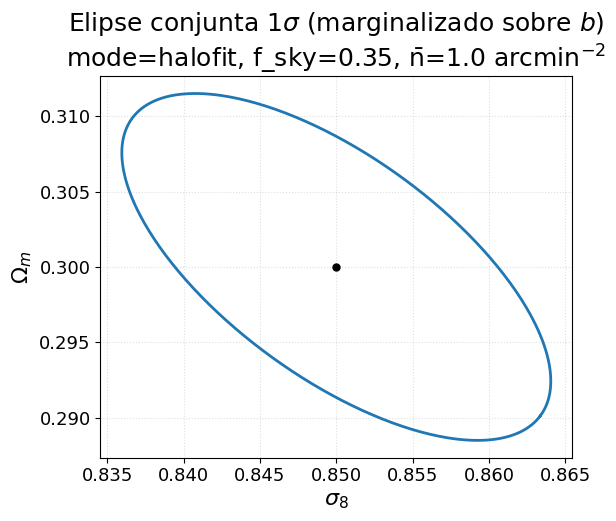

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# ===========================
# Parâmetros do modelo/experimento
# ===========================
h_ref   = 0.67
Ob_ref  = 0.049
Om_cen  = 0.30          # ponto central Ω_m
ns_ref  = 0.965
s8_cen  = 0.85          # ponto central σ8
b_cen   = 1.0           # ponto central do bias
lmax    = 3000

# janela tomográfica (um bin)
z_mean, z_width = 0.5, 0.1

# modo linear vs não linear
nonlinear_mode = 'halofit'   # 'halofit' ou 'none'

# cobertura de céu e densidade de fontes
f_sky         = 0.35               # fração de céu
nbar_arcmin2  = 1.0                # gal/arcmin^2
arcmin2_to_sr = (60.0*180.0/np.pi)**2
nbar_sr       = nbar_arcmin2 * arcmin2_to_sr

# cortes em multipolos
ell_min, ell_max = 2, 1500

# grades (diferença finita central, 3 pontos)
s8_grid = [0.80, 0.85, 0.90]   # passo 0.05
Om_grid = [0.25, 0.30, 0.35]   # passo 0.05
b_grid  = [0.90, 1.00, 1.10]   # passo 0.10 (mais “curto” por ser mais trivial)

# ===========================
# Helpers CLASS
# ===========================
def base_params(sig8, Om_m, bias, non_linear_mode):
    return {
        'modes': 's',
        'output': 'tCl, pCl, lCl, mPk, nCl, dCl',
        'lensing': 'yes',
        'l_max_scalars': lmax,
        'l_max_lss':     lmax,
        'number_count_contributions': 'density',
        'non linear': non_linear_mode,     # 'none' ou 'halofit'

        'Omega_Lambda': 0,
        'Omega_k': 0,
        'w0_fld': '-1.',
        'wa_fld': '0.0',

        'n_s': ns_ref,
        'sigma8': float(sig8),

        'gauge': 'Synchronous',
        'background_verbose': 0,
        'perturbations_verbose': 0,

        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': 5.0,
        'k_per_decade_for_pk': 50,

        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_m - Ob_ref,

        'selection': 'gaussian',
        'selection_mean': str(z_mean),
        'selection_width': str(z_width),
        #'non_diagonal': 0,
        'selection_bias': str(bias),

        'N_ur': 3.046,
        'N_ncdm': 0,
    }

def clgg(sig8, Om_m, bias, non_linear_mode):
    cosmo = Class()
    cosmo.set(base_params(sig8, Om_m, bias, non_linear_mode))
    cosmo.compute()
    cl = cosmo.density_cl(lmax)
    # formato novo (v3+): cl['dd']['dens[1]-dens[1]']
    if 'dd' in cl and isinstance(cl['dd'], dict):
        Cl = np.asarray(cl['dd'].get('dens[1]-dens[1]', list(cl['dd'].values())[0]))
        ell = np.arange(Cl.size)
    else:  # formato antigo
        keys = [k for k in cl if ('_1_1' in k) and any(t in k for t in ['dd','density','number_count'])]
        if not keys:
            keys = [k for k in cl if 'density' in k or 'number_count' in k or str(k).startswith('dd')]
        Cl  = np.asarray(cl[keys[0]])
        ell = np.asarray(cl.get('ell', np.arange(Cl.size)))
    return ell, Cl

def central_derivative(param, grid, fixed, non_linear_mode):
    """Diferença finita central: retorna (ell, C_central, dC/dparam)."""
    x_minus, x0, x_plus = grid
    def eval_at(vals):
        return clgg(vals['sigma8'], vals['Omega_m'], vals['bias'], non_linear_mode)

    vm = fixed.copy(); vm[param] = x_minus
    v0 = fixed.copy(); v0[param] = x0
    vp = fixed.copy(); vp[param] = x_plus

    ell, C_m = eval_at(vm)
    _,   C_0 = eval_at(v0)
    _,   C_p = eval_at(vp)

    h = (x_plus - x_minus)
    dCdp = (C_p - C_m) / h
    return ell, C_0, dCdp

def to_common_ell(ell_targets, arrays, ell_min_req=2, ell_max_req=1500):
    """Interpola vários arrays para um eixo ℓ comum inteiro."""
    lmin = int(max([e.min() for e in ell_targets] + [ell_min_req]))
    lmax = int(min([e.max() for e in ell_targets] + [ell_max_req]))
    ell  = np.arange(lmin, lmax+1)
    outs = []
    for e,a in zip(ell_targets, arrays):
        outs.append(np.interp(ell, e, a))
    return ell, outs

# ===========================
# Derivadas (σ8, Ωm, b)
# ===========================
fixed = {'bias': b_cen, 'sigma8': s8_cen, 'Omega_m': Om_cen}

ell_s8, C0_1, dCds8 = central_derivative('sigma8',  s8_grid, fixed, nonlinear_mode)
ell_Om,  C0_2, dCdOm = central_derivative('Omega_m', Om_grid, fixed, nonlinear_mode)
ell_b,   C0_3, dCdb  = central_derivative('bias',    b_grid,  fixed, nonlinear_mode)

# Unifica ℓ e C_central
ell, (C0_s8, C0_Om, C0_b) = to_common_ell(
    [ell_s8, ell_Om, ell_b], [C0_1, C0_2, C0_3], ell_min, ell_max
)
# As três avaliações do C0 devem ser (quase) idênticas; usamos a primeira:
C0 = C0_s8
dCds8 = np.interp(ell, ell_s8, dCds8)
dCdOm = np.interp(ell, ell_Om,  dCdOm)
dCdb  = np.interp(ell, ell_b,   dCdb)

# ===========================
# Fisher 3×3 para p = (σ8, Ωm, b)
# ===========================
N_ell = 1.0 / nbar_sr
C_obs = C0 + N_ell
pref  = (2.0*ell + 1.0) * f_sky / 2.0

# Monta derivadas como matriz [3, L]
dC = np.vstack([dCds8, dCdOm, dCdb])   # shape (3, L)
# Fisher (auto-espectro) F_ij = Σℓ pref * (dC_i dC_j) / C_obs^2
F = np.zeros((3,3))
for i in range(3):
    for j in range(i,3):
        val = np.sum(pref * dC[i]*dC[j] / (C_obs**2))
        F[i,j] = F[j,i] = val

# ===========================
# Marginalização sobre b
# ===========================
# Inverte Fisher 3x3 -> Cov_3x3 e extrai sub-covariância dos 2 primeiros (σ8,Ωm)
Cov3 = np.linalg.inv(F)
Cov2 = Cov3[:2,:2]
F2   = np.linalg.inv(Cov2)   # Fisher marginalizado

# Erros e correlação após marginalizar b
sigma_s8 = np.sqrt(Cov2[0,0])
sigma_Om = np.sqrt(Cov2[1,1])
rho      = Cov2[0,1] / (sigma_s8 * sigma_Om)

print("Fisher(σ8, Ωm, b):\n", F)
print("\nCov_3x3:\n", Cov3)
print("\n[Fisher 2x2 marginalizado sobre b]\n", F2)
print(f"\nErros 1σ (marg.):  σ(σ8) = {sigma_s8:.4e}   σ(Ωm) = {sigma_Om:.4e}")
print(f"Correlação ρ(σ8, Ωm) = {rho:.3f}")

# ===========================
# Plot da elipse 1σ conjunta (68% CL) para (σ8, Ωm)
# ===========================
def plot_ellipse_2d(mu, Cov, ax=None, n_std=1.0, **kwargs):
    """
    Plota elipse para uma covariância 2x2.
    n_std = 1σ conjunta -> use sqrt(Δχ²) com Δχ²=2.30 (68% para 2 dof).
    """
    if ax is None:
        ax = plt.gca()
    # fator para 68% em 2D:
    delta_chi2 = 2.30
    from numpy.linalg import eig
    vals, vecs = eig(Cov)
    # semi-eixos
    order = np.argsort(vals)[::-1]
    vals, vecs = vals[order], vecs[:,order]
    a = np.sqrt(vals[0] * delta_chi2)
    b = np.sqrt(vals[1] * delta_chi2)
    theta = np.arctan2(vecs[1,0], vecs[0,0])
    # param eq. da elipse
    t = np.linspace(0, 2*np.pi, 400)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    ellipse = R @ np.vstack((a*np.cos(t), b*np.sin(t)))
    x = mu[0] + ellipse[0,:]
    y = mu[1] + ellipse[1,:]
    ax.plot(x, y, **kwargs)
    return ax

plt.figure(figsize=(6.2,5.4))
ax = plt.gca()
plot_ellipse_2d(mu=np.array([s8_cen, Om_cen]), Cov=Cov2, ax=ax, lw=2, color='tab:blue')
ax.scatter([s8_cen], [Om_cen], c='k', s=25, zorder=3)
ax.set_xlabel(r'$\sigma_8$')
ax.set_ylabel(r'$\Omega_m$')
ax.set_title(r'Elipse conjunta 1$\sigma$ (marginalizado sobre $b$)' + f"\nmode={nonlinear_mode}, f_sky={f_sky}, n̄={nbar_arcmin2} arcmin$^{{-2}}$")
ax.grid(True, ls=':', alpha=0.4)
plt.tight_layout()
plt.show()


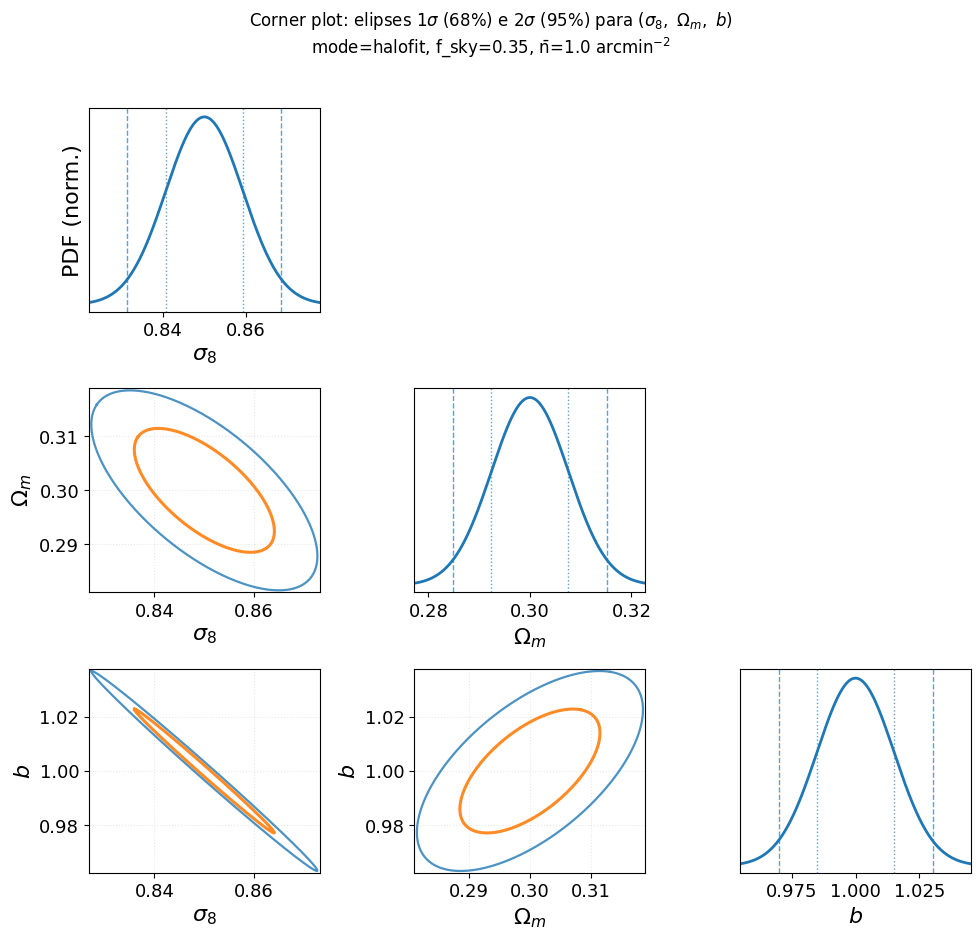

In [20]:
# ===========================
# Corner plot: (σ8, Ωm, b)
# ===========================
import numpy as np
import matplotlib.pyplot as plt

# Ordem dos parâmetros no seu F/Cov: [σ8, Ωm, b]
labels = [r'$\sigma_8$', r'$\Omega_m$', r'$b$']
mu     = np.array([s8_cen, Om_cen, b_cen])
Cov    = Cov3.copy()
sigmas = np.sqrt(np.diag(Cov))

# Fatores Δχ² para 68% e 95% (2 dof)
dchi2_68 = 2.30
dchi2_95 = 5.99

def ellipse_points(mean2, Cov2, dchi2, npts=400):
    """Retorna pontos (x,y) da elipse dada por Cov2 e nível Δχ²."""
    vals, vecs = np.linalg.eigh(Cov2)
    # garantir ordenação decrescente
    order = np.argsort(vals)[::-1]
    vals, vecs = vals[order], vecs[:, order]
    a = np.sqrt(vals[0] * dchi2)  # semi-eixo maior
    b = np.sqrt(vals[1] * dchi2)  # semi-eixo menor
    t = np.linspace(0, 2*np.pi, npts)
    circ = np.vstack((a*np.cos(t), b*np.sin(t)))  # elipse alinhada aos autovetores
    R = vecs
    xy = (R @ circ)
    return mean2[0] + xy[0], mean2[1] + xy[1]

def gaussian_1d(x, mean, sigma):
    return np.exp(-0.5*((x-mean)/sigma)**2) / (np.sqrt(2*np.pi)*sigma)

# Limites 1D por parâmetro (±3σ)
xlims = [(mu[i]-3*sigmas[i], mu[i]+3*sigmas[i]) for i in range(3)]
# Limites 2D por par (±2.5σ em cada eixo, a partir das marginais)
xy_lims = {}
for i in range(3):
    for j in range(i):
        xy_lims[(i,j)] = ((mu[j]-2.5*sigmas[j], mu[j]+2.5*sigmas[j]),
                          (mu[i]-2.5*sigmas[i], mu[i]+2.5*sigmas[i]))

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(wspace=0.16, hspace=0.16)

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if i == j:
            # --- Diagonal: 1D Gauss ---
            xmin, xmax = xlims[i]
            x = np.linspace(xmin, xmax, 600)
            y = gaussian_1d(x, mu[i], sigmas[i])
            ax.plot(x, y, lw=2)
            # linhas em ±1σ e ±2σ
            for k, ls in [(1, ':'), (2, '--')]:
                ax.axvline(mu[i] - k*sigmas[i], ls=ls, lw=1, alpha=0.7)
                ax.axvline(mu[i] + k*sigmas[i], ls=ls, lw=1, alpha=0.7)
            ax.set_xlim(xmin, xmax)
            ax.set_yticks([])
            ax.set_xlabel(labels[i])
            if j == 0:
                ax.set_ylabel('PDF (norm.)')
        elif i > j:
            # --- Abaixo da diagonal: elipses 2D (68% e 95%) ---
            # subcovariância marginalizada em (j,i): pega sub-bloco 2×2 da Cov3
            idx = [j, i]
            Cov2 = Cov[np.ix_(idx, idx)]
            mean2 = mu[idx]
            x68, y68 = ellipse_points(mean2, Cov2, dchi2_68)
            x95, y95 = ellipse_points(mean2, Cov2, dchi2_95)
            ax.plot(x95, y95, lw=1.6, alpha=0.8)       # 95% (2σ)
            ax.plot(x68, y68, lw=2.2, alpha=0.9)       # 68% (1σ)
            # limites
            (xmin, xmax), (ymin, ymax) = xy_lims[(i,j)]
            ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)
            ax.set_xlabel(labels[j])
            ax.set_ylabel(labels[i])
            ax.grid(True, ls=':', alpha=0.3)
        else:
            # --- Acima da diagonal: vazio ---
            ax.axis('off')

fig.suptitle(
    r'Corner plot: elipses $1\sigma$ (68%) e $2\sigma$ (95%) para '
    r'$(\sigma_8,\ \Omega_m,\ b)$' + 
    f"\nmode={nonlinear_mode}, f_sky={f_sky}, n̄={nbar_arcmin2} arcmin$^{{-2}}$",
    y=0.94, fontsize=12
)
plt.tight_layout(rect=[0,0,1,0.93])
plt.show()


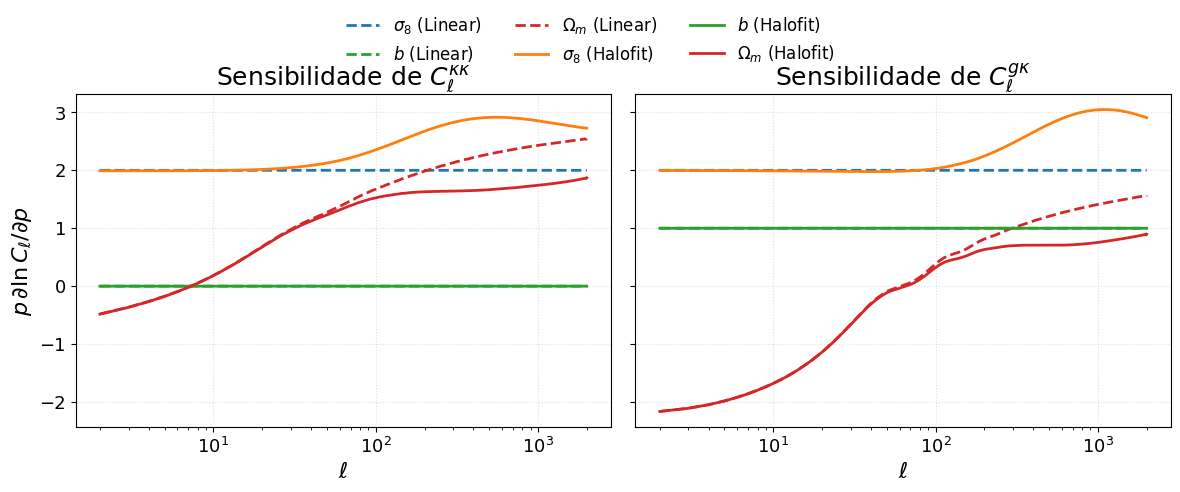

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# ===========================
# Parâmetros de referência
# ===========================
h_ref   = 0.67
Ob_ref  = 0.049
Om_ref0 = 0.30
ns_ref  = 0.965
sig8_0  = 0.85
bias_0  = 1.0
lmax    = 2000

# Seleção (um bin em z~0.5)
z_mean, z_width = 0.5, 0.1

# Grades para diferença finita central
sig8_grid = [0.80, 0.85, 0.90]
Om_grid   = [0.25, 0.30, 0.35]
bias_grid = [0.9,  1.0,  1.1]

# ===========================
# Helpers
# ===========================
def base_params(sig8, Om_m, bias, nonlinear_mode):
    return {
        'modes': 's',
        'output': 'tCl, pCl, lCl, mPk, dCl, sCl',
        'lensing': 'yes',
        'l_max_scalars': lmax,
        'l_max_lss': lmax,
        'number_count_contributions': 'density',
        'non linear': nonlinear_mode,     # 'none' ou 'halofit'
        'selection': 'gaussian',
        'selection_mean': str(z_mean),
        'selection_width': str(z_width),
        'selection_bias': str(bias),      # bias linear para dCl
        'Omega_Lambda': 0,
        'Omega_k': 0,
        'w0_fld': '-1.',
        'wa_fld': '0.0',
        'n_s': ns_ref,
        'sigma8': float(sig8),
        'gauge': 'Synchronous',
        'background_verbose': 0,
        'perturbations_verbose': 0,
        'z_pk': '1.0, 0.0',
        'P_k_max_h/Mpc': 5.0,
        'k_per_decade_for_pk': 50,
        'h': h_ref,
        'Omega_b': Ob_ref,
        'Omega_cdm': Om_m - Ob_ref,
        'N_ur': 3.046,
        'N_ncdm': 0
    }

def run_cls(sig8, Om_m, bias, nonlinear_mode):
    """
    Retorna (ell, Ckk, Cgk) com corte ℓ>=2 a partir de density_cl()
    - Ckk = C_ell^{kappa kappa}  → cl['ll']['lens[1]-lens[1]']
    - Cgk = C_ell^{g kappa}      → cl['dl']['dens[1]-lens[1]']
    """
    cosmo = Class()
    cosmo.set(base_params(sig8, Om_m, bias, nonlinear_mode))
    cosmo.compute()
    cl = cosmo.density_cl(lmax)

    ell  = np.asarray(cl['ell'])
    Ckk  = np.asarray(cl['ll']['lens[1]-lens[1]'])
    Cgk  = np.asarray(cl['dl']['dens[1]-lens[1]'])
    mask = ell >= 2
    return ell[mask], Ckk[mask], Cgk[mask]

def finite_diff_one(param, grid, fixed, nonlinear_mode, which='kk'):
    """
    Diferença finita central para o espectro escolhido:
      which ∈ {'kk','gk'} → devolve ∂C/∂p e C central
    """
    x_minus, x0, x_plus = grid
    def eval_at(vals):
        ell, Ckk, Cgk = run_cls(vals['sigma8'], vals['Omega_m'], vals['bias'], nonlinear_mode)
        return ell, (Ckk if which=='kk' else Cgk)

    vm = fixed.copy(); vm[param] = x_minus
    v0 = fixed.copy(); v0[param] = x0
    vp = fixed.copy(); vp[param] = x_plus

    ell, C_m = eval_at(vm)
    _,   C_0 = eval_at(v0)
    _,   C_p = eval_at(vp)

    h = x_plus - x_minus
    dCdp = (C_p - C_m) / h
    return ell, C_0, dCdp

def p_dlnC_dp(ell, dCdp, C, p0):
    """Retorna p * ∂ln C / ∂p."""
    eps = 1e-300
    return p0 * dCdp / np.maximum(C, eps)

def sensitivities_for(mode_label, nonlinear_mode, fixed):
    # κκ
    ell_s8, C0_kk_1, dCds8_kk = finite_diff_one('sigma8', sig8_grid, fixed, nonlinear_mode, which='kk')
    ell_b,  C0_kk_2, dCdb_kk  = finite_diff_one('bias',   bias_grid, fixed, nonlinear_mode, which='kk')
    ell_Om, C0_kk_3, dCdOm_kk = finite_diff_one('Omega_m',Om_grid,  fixed, nonlinear_mode, which='kk')
    # gκ
    ell_s8_gk, C0_gk_1, dCds8_gk = finite_diff_one('sigma8', sig8_grid, fixed, nonlinear_mode, which='gk')
    ell_b_gk,  C0_gk_2, dCdb_gk  = finite_diff_one('bias',   bias_grid, fixed, nonlinear_mode, which='gk')
    ell_Om_gk, C0_gk_3, dCdOm_gk = finite_diff_one('Omega_m',Om_grid,  fixed, nonlinear_mode, which='gk')

    # eixo comum para cada tipo de espectro
    lmin_kk = int(max(ell_s8.min(), ell_b.min(), ell_Om.min()))
    lmax_kk = int(min(ell_s8.max(), ell_b.max(), ell_Om.max()))
    ell_kk  = np.arange(lmin_kk, lmax_kk+1)

    lmin_gk = int(max(ell_s8_gk.min(), ell_b_gk.min(), ell_Om_gk.min()))
    lmax_gk = int(min(ell_s8_gk.max(), ell_b_gk.max(), ell_Om_gk.max()))
    ell_gk  = np.arange(lmin_gk, lmax_gk+1)

    interp = lambda e, a, ec: np.interp(ec, e, a)

    S_kk = {
        'ell': ell_kk,
        'sig8': p_dlnC_dp(ell_kk, interp(ell_s8, dCds8_kk, ell_kk), interp(ell_s8, C0_kk_1, ell_kk), fixed['sigma8']),
        'b'   : p_dlnC_dp(ell_kk, interp(ell_b,  dCdb_kk,  ell_kk), interp(ell_b,  C0_kk_2, ell_kk), fixed['bias']),
        'Om'  : p_dlnC_dp(ell_kk, interp(ell_Om, dCdOm_kk, ell_kk), interp(ell_Om, C0_kk_3, ell_kk), fixed['Omega_m'])
    }
    S_gk = {
        'ell': ell_gk,
        'sig8': p_dlnC_dp(ell_gk, interp(ell_s8_gk, dCds8_gk, ell_gk), interp(ell_s8_gk, C0_gk_1, ell_gk), fixed['sigma8']),
        'b'   : p_dlnC_dp(ell_gk, interp(ell_b_gk,  dCdb_gk,  ell_gk), interp(ell_b_gk,  C0_gk_2, ell_gk), fixed['bias']),
        'Om'  : p_dlnC_dp(ell_gk, interp(ell_Om_gk, dCdOm_gk, ell_gk), interp(ell_Om_gk, C0_gk_3, ell_gk), fixed['Omega_m'])
    }
    return {mode_label: {'kk': S_kk, 'gk': S_gk}}

# ===========================
# Computa: Linear vs Halofit
# ===========================
fixed = {'bias': bias_0, 'sigma8': sig8_0, 'Omega_m': Om_ref0}
res = {}
res.update(sensitivities_for('Linear',  'none',     fixed))
res.update(sensitivities_for('Halofit', 'halofit',  fixed))

# ===========================
# Plot: dois subplots (κκ e gκ)
# ===========================
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# (a) kappa-kappa
ax = axes[0]
for label, ls in [('Linear','--'), ('Halofit','-')]:
    ell = res[label]['kk']['ell']
    line, = ax.semilogx(ell, res[label]['kk']['sig8'], ls, lw=2, label=fr'$\sigma_8$ ({label})')
    ax.semilogx(ell, res[label]['kk']['b'],   ls, lw=2, color='tab:green', label=fr'$b$ ({label})')
    ax.semilogx(ell, res[label]['kk']['Om'],  ls, lw=2, color='tab:red',   label=fr'$\Omega_m$ ({label})')
ax.set_title(r'Sensibilidade de $C_\ell^{\kappa\kappa}$')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$p\,\partial\ln C_\ell/\partial p$')
ax.grid(True, ls=':', alpha=0.4)

# (b) g-kappa
ax = axes[1]
for label, ls in [('Linear','--'), ('Halofit','-')]:
    ell = res[label]['gk']['ell']
    ax.semilogx(ell, res[label]['gk']['sig8'], ls, lw=2, label=fr'$\sigma_8$ ({label})')
    ax.semilogx(ell, res[label]['gk']['b'],   ls, lw=2, color='tab:green', label=fr'$b$ ({label})')
    ax.semilogx(ell, res[label]['gk']['Om'],  ls, lw=2, color='tab:red',   label=fr'$\Omega_m$ ({label})')
ax.set_title(r'Sensibilidade de $C_\ell^{g\kappa}$')
ax.set_xlabel(r'$\ell$')
ax.grid(True, ls=':', alpha=0.4)

# Legenda combinada (fora dos eixos para não poluir)
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper center', ncol=3, frameon=False)

plt.tight_layout(rect=[0,0,1,0.92])
plt.show()
